#### EDA de yahoo finance

In [77]:
# Vamos a importar el dataset del SPY500 el cual agrupa 503 empresas de Estados Unidos.
#Importamos las librerías necesarias para leer el dataset y armar nuestras correlaciones.
from pandas_datareader import data as pdr
import yfinance as yf
import bs4 as bs
import requests
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
yf.pdr_override() 
dataSPY = pdr.get_data_yahoo("SPY", start="2000-01-01", end="2023-01-01") # Desde el año 2000 hasta el 2023.
dataframe = pd.DataFrame(dataSPY)

[*********************100%***********************]  1 of 1 completed


In [78]:
#Realizamos un describe para ver las estadisticas de cada columna.
dataframe.describe()

Open         High          Low        Close    Adj Close  \
count  5787.000000  5787.000000  5787.000000  5787.000000  5787.000000   
mean    187.367809   188.500931   186.118987   187.369871   160.671897   
std      96.176576    96.677817    95.607544    96.184185   104.000073   
min      67.949997    70.000000    67.099998    68.110001    51.957130   
25%     118.474998   119.220001   117.805000   118.485001    85.647293   
50%     143.279999   144.110001   142.309998   143.199997   107.960052   
75%     236.449997   237.334999   235.340004   236.480003   213.339783   
max     479.220001   479.980011   476.059998   477.709991   470.083710   

             Volume  
count  5.787000e+03  
mean   1.092615e+08  
std    9.390218e+07  
min    1.436600e+06  
25%    5.018940e+07  
50%    8.153040e+07  
75%    1.423790e+08  
max    8.710263e+08

<AxesSubplot: >

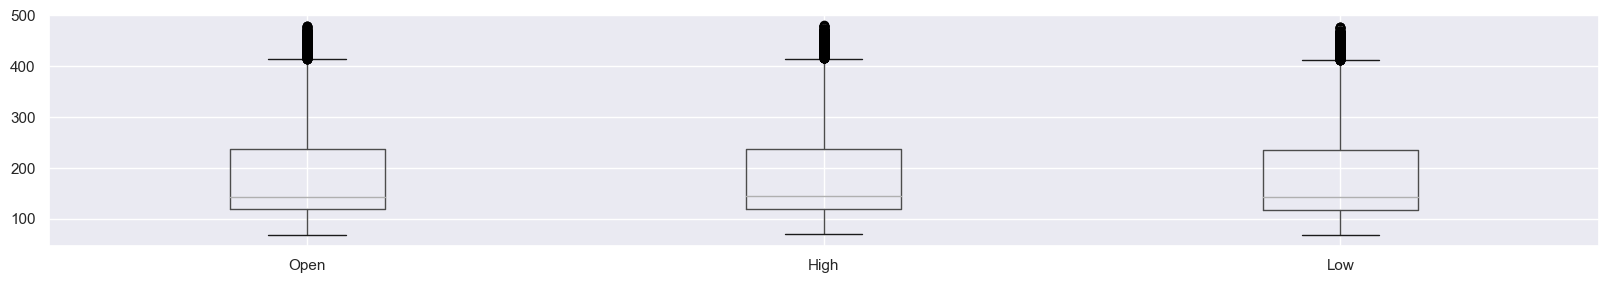

In [87]:
dataframe.boxplot(column=['Open', 'High', 'Low'])  

<AxesSubplot: >

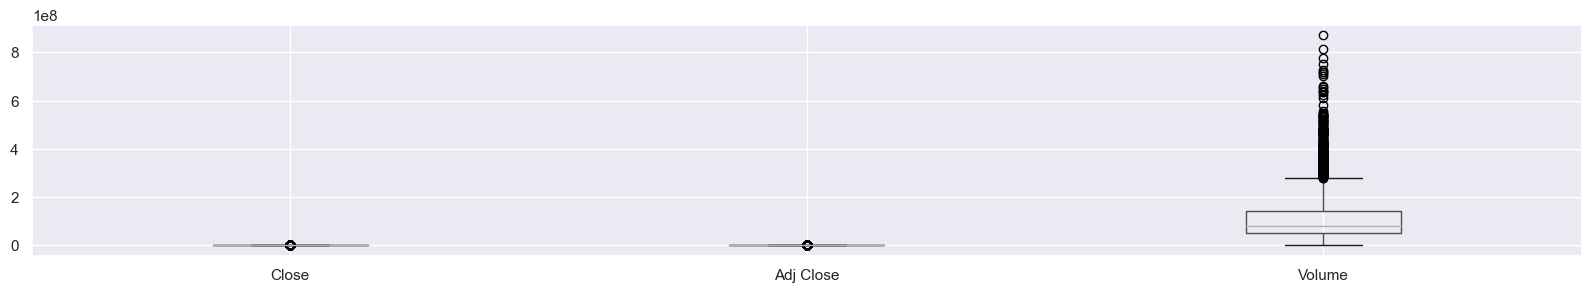

In [89]:
dataframe.boxplot(column=['Close', 'Adj Close', 'Volume'])  

Vemos que en la columna Volume existen muchos outliers.

In [79]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5787 entries, 2000-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5787 non-null   float64
 1   High       5787 non-null   float64
 2   Low        5787 non-null   float64
 3   Close      5787 non-null   float64
 4   Adj Close  5787 non-null   float64
 5   Volume     5787 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 316.5 KB


In [80]:
dataframe.isna().sum()
#Vemos que no tiene nulos.


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0.5, 1.0, 'Distribución del valor Open')

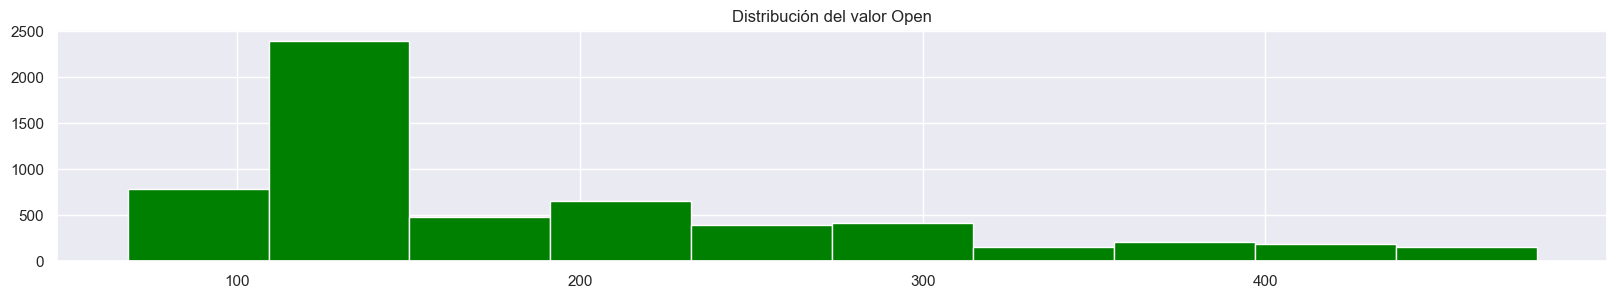

In [81]:
plt.hist(dataframe['Open'], color = 'green')
plt.title('Distribución del valor Open')

Text(0.5, 1.0, 'Distribución del valor Close')

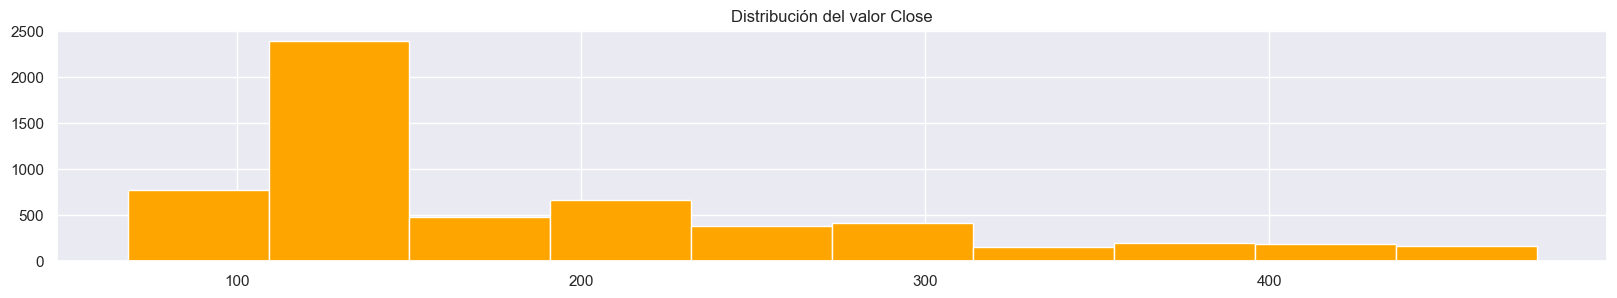

In [82]:
plt.hist(dataframe['Close'], color = 'orange')
plt.title('Distribución del valor Close')

Text(0.5, 1.0, 'Distribución del valor AdjClose')

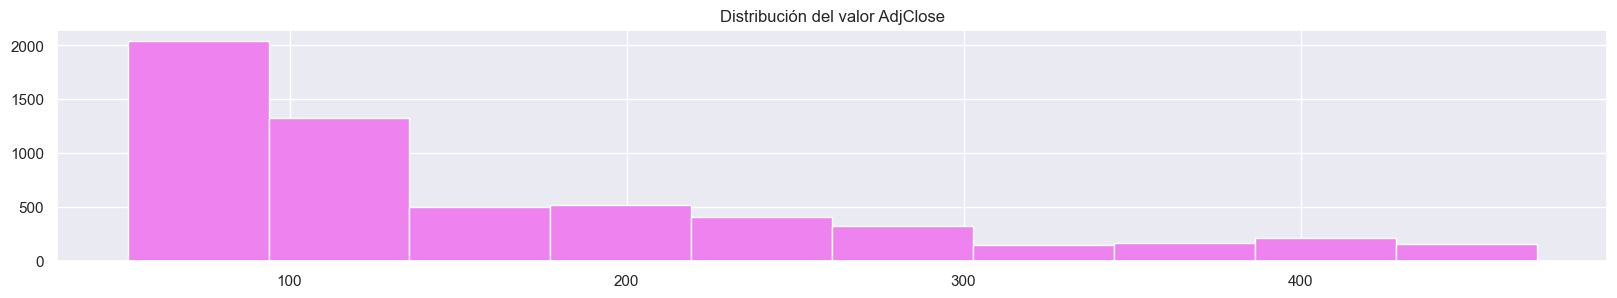

In [83]:
#El cierre ajustado es el precio de cierre después de los ajustes para todas las divisiones y distribuciones de dividendos 
#aplicables. Los datos se ajustan utilizando los multiplicadores de división y dividendos apropiados, 
#de acuerdo con los estándares del Centro de Investigación de Precios de Valores (CRSP).
plt.hist(dataframe['Adj Close'], color = 'violet')
plt.title('Distribución del valor AdjClose')

Text(0.5, 1.0, 'Distribución del valor Volume')

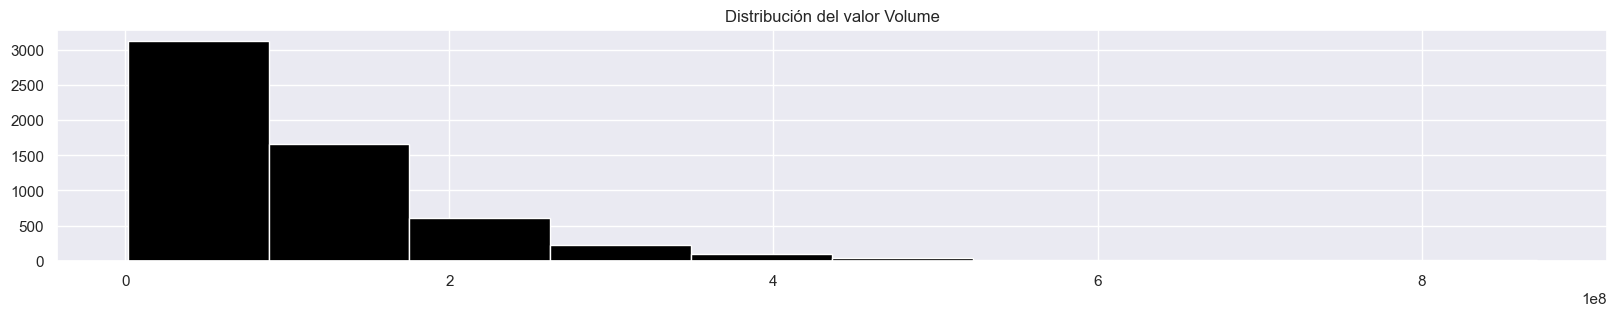

In [84]:
plt.hist(dataframe['Volume'], color = 'black')
plt.title('Distribución del valor Volume')
#La mayoria de valores está entre 0 y 2 x 1e8 . 

In [85]:
#Ahora analizaremos el valor en el tiempo. Calculamos la media movil con una ventana de 6. 
dataframe['Date'] = dataframe.index

Text(0.5, 1.0, 'Media movil de 6 periodos de Adj Close - SPY500')

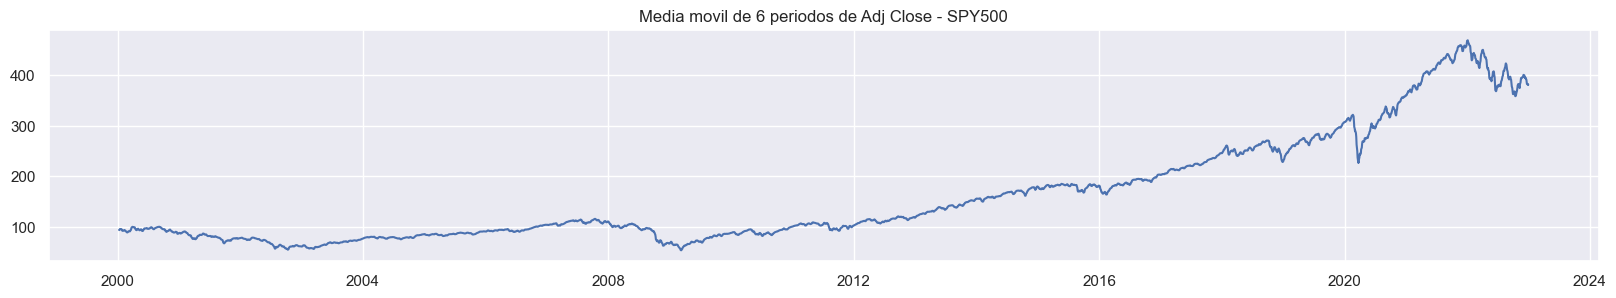

In [86]:
#Ploteamos
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(dataframe['Date'],dataframe['Adj Close'].rolling(6).mean()); #media movil
plt.title('Media movil de 6 periodos de Adj Close - SPY500') 

Vemos que efectivamente hubo una tendecia bajista hacia el año 2003, luego el 2009, y luego a inicios de 2020, coincidiendo con el covid.
También vemos que los precios se incrementaron en el tiempo. 

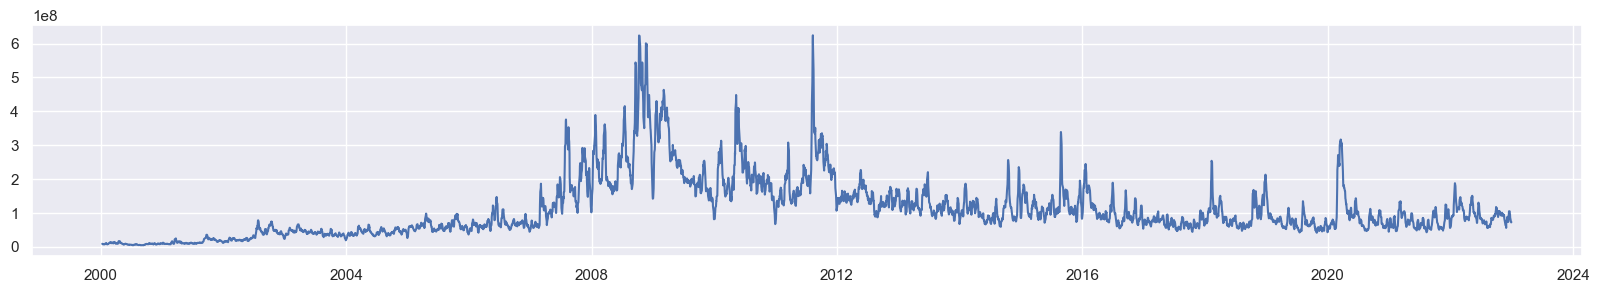

In [25]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(dataframe['Date'],dataframe['Volume'].rolling(6).mean()); 

Respecto al volumen, vemos que se generó más movimiento durante 2008 y 2012.

Matriz de correlación

A continuación veremos si existe alguna correlación entre las columnas. 

In [33]:
dataframe.drop('Date', axis = 1 , inplace = True)

In [34]:
def minmax_norm(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())

std_dataframe = minmax_norm(dataframe)

In [35]:
std_dataframe

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2000-01-03  0.195249  0.190863  0.187732  0.188788   0.103681  0.007737
2000-01-04  0.183775  0.180649  0.177378  0.174902   0.094767  0.007651
2000-01-05  0.175037  0.174475  0.171533  0.175513   0.095159  0.012352
2000-01-06  0.174277  0.174399  0.172755  0.170020   0.091632  0.005509
2000-01-07  0.175949  0.184765  0.178410  0.189551   0.104171  0.007624
...              ...       ...       ...       ...        ...       ...
2022-12-23  0.757896  0.763598  0.760294  0.768555   0.791514  0.067182
2022-12-27  0.765531  0.763818  0.764256  0.764868   0.787902  0.057730
2022-12-28  0.761981  0.764403  0.756358  0.753296   0.776566  0.079894
2022-12-29  0.757848  0.766745  0.762862  0.769849   0.792781  0.075362
2022-12-30  0.760303  0.762427  0.761272  0.767383   0.790366  0.094917

[5787 rows x 6 columns]

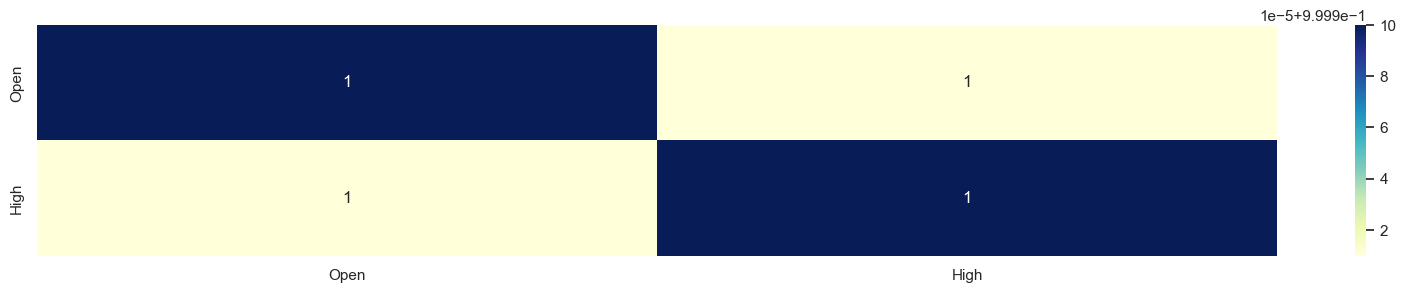

In [48]:
sns.heatmap(std_dataframe[['Open','High']].corr(),cmap="YlGnBu", annot=True);

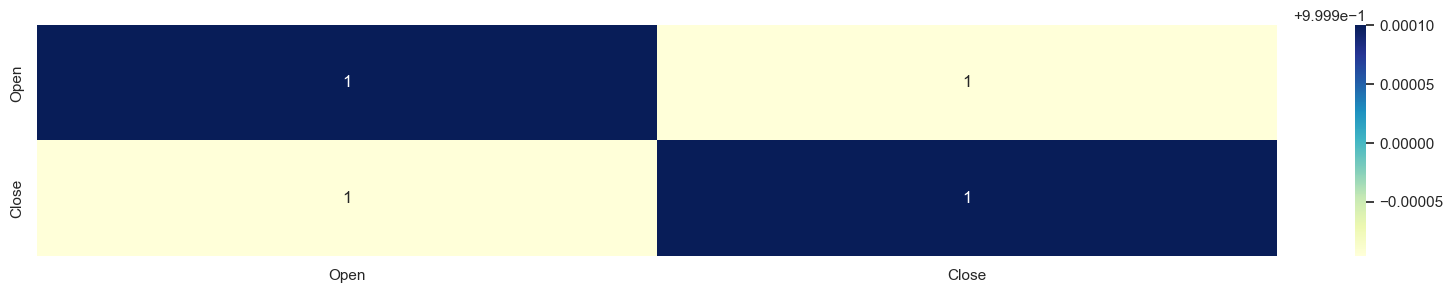

In [47]:
sns.heatmap(std_dataframe[['Open','Close']].corr(),cmap="YlGnBu", annot=True);

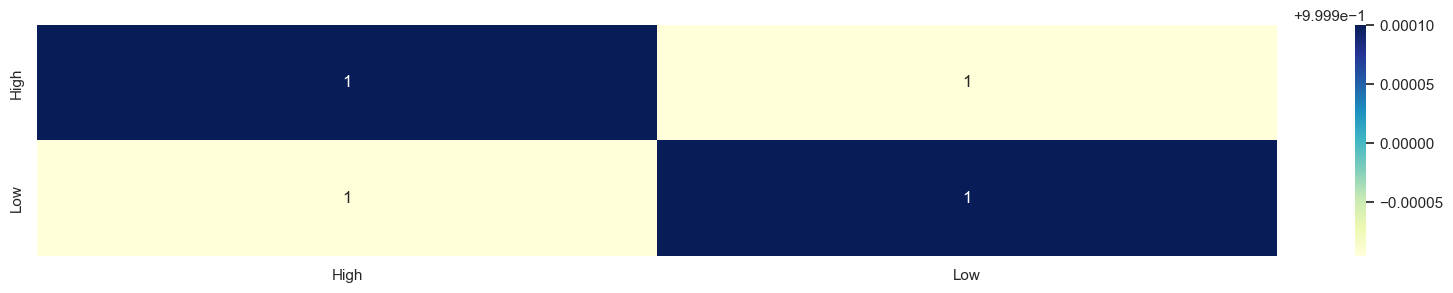

In [46]:
sns.heatmap(std_dataframe[['High','Low']].corr(),cmap="YlGnBu", annot=True);

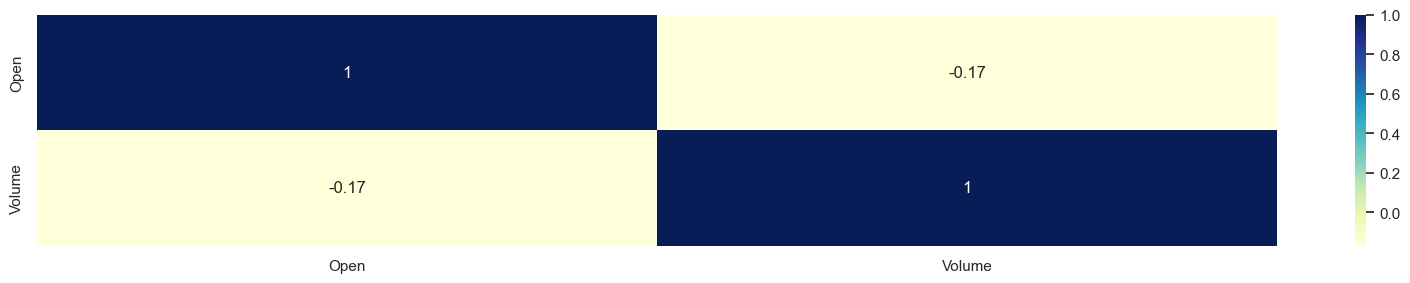

In [45]:
sns.heatmap(std_dataframe[['Open','Volume']].corr(),cmap="YlGnBu", annot=True);

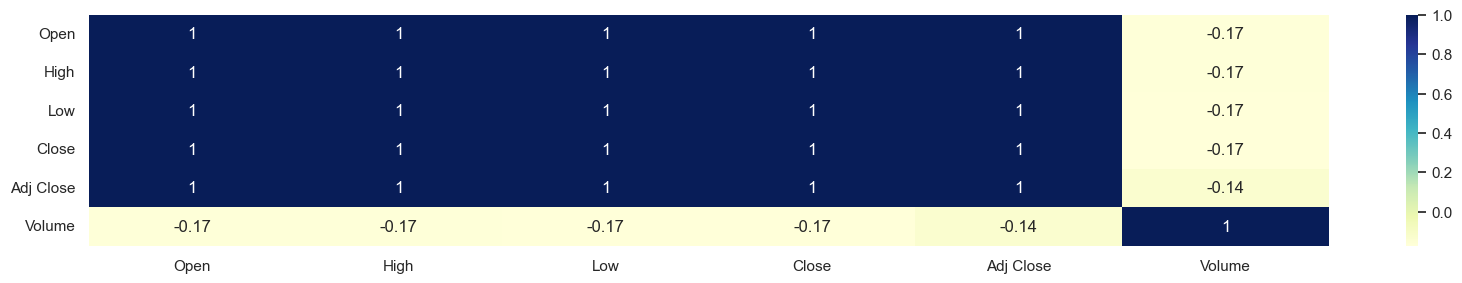

In [43]:
sns.heatmap(std_dataframe.corr(),cmap="YlGnBu", annot=True);

- Vemos que las variables Open, High, Low, Close, Adj Close se relacionan de igual manera con la variable Volume (casi nula). Y que asimismo se relacionan mucho entre sí.
- Trabajaremos con la variable Adj Close en nuestro analisis posterior. 
  
El cierre ajustado (Adj Close) es el precio de cierre después de los ajustes para todas las divisiones y distribuciones de dividendos aplicables. Los datos se ajustan utilizando los multiplicadores de división y dividendos apropiados, de acuerdo con los estándares del Centro de Investigación de Precios de Valores (CRSP).

Ahora procedemos a analizar la información de las empresas. 

In [49]:
# Con este codigo sacamos la información de las 500 empresas por separado. 
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2000,1,1)  #desde el 2000
end = datetime.datetime(2023,2,1)   #hasta el 2023
data = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No timezone found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [50]:
#Analizamos la data recopilada. Vemos que se recopilo la info de 503 empresas, con 6 columnas cada una. 
dataframe500 = pd.DataFrame(data)
dataframe500.head()

Adj Close                                             \
                             A AAL AAP      AAPL ABBV       ABC       ABT   
Date                                                                        
2000-01-03 00:00:00  44.001266 NaN NaN  0.850643  NaN  2.988897  9.221024   
2000-01-04 00:00:00  40.640064 NaN NaN  0.778926  NaN  2.784837  8.957565   
2000-01-05 00:00:00  38.119133 NaN NaN  0.790324  NaN  3.000901  8.941103   
2000-01-06 00:00:00  36.667709 NaN NaN  0.721930  NaN  3.228970  9.253959   
2000-01-07 00:00:00  39.723366 NaN NaN  0.756128  NaN  3.649096  9.352752   

                                              ... Volume                     \
                         ACGL ACN       ADBE  ...   WYNN      XEL       XOM   
Date                                          ...                             
2000-01-03 00:00:00  1.277778 NaN  16.274675  ...    NaN  2738600  13458200   
2000-01-04 00:00:00  1.270833 NaN  14.909397  ...    NaN   425200  14510800   
2000-01-05 00:00:00  1.388889 NaN  15.204174  ...    NaN   500200  17485000   
2000-01-06 00:00:00  1.375000 NaN  15.328293  ...    NaN   344100  19461600   
2000-01-07 00:00:00  1.451389 NaN  16.072987  ...    NaN   469500  16603800   

                                                                     
                        XRAY XYL      YUM ZBH     ZBRA     ZION ZTS  
Date                                                                 
2000-01-03 00:00:00   582300 NaN  3033493 NaN  1055700  1199600 NaN  
2000-01-04 00:00:00   317700 NaN  3315031 NaN   522450   816100 NaN  
2000-01-05 00:00:00  1188000 NaN  4642602 NaN   612225  1124700 NaN  
2000-01-06 00:00:00   534300 NaN  3947658 NaN   263925  1112100 NaN  
2000-01-07 00:00:00  1401000 NaN  6063647 NaN   333900   782000 NaN  

[5 rows x 3018 columns]

In [56]:
dataframe500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5807 entries, 2000-01-03 00:00:00 to 2023-01-31 00:00:00
Columns: 3018 entries, ('Adj Close', 'A') to ('Volume', 'ZTS')
dtypes: float64(2653), int64(365)
memory usage: 133.8+ MB


In [55]:
dataframe500['Open'].shape

(5807, 503)

In [57]:
dataframe500.isna().sum()

Adj Close  A          0
           AAL     1441
           AAP      478
           AAPL       0
           ABBV    3269
                   ... 
Volume     YUM        0
           ZBH      393
           ZBRA       0
           ZION       0
           ZTS     3290
Length: 3018, dtype: int64

In [58]:
dataframe500['Adj Close'].isna().sum()

A          0
AAL     1441
AAP      478
AAPL       0
ABBV    3269
        ... 
YUM        0
ZBH      393
ZBRA       0
ZION       0
ZTS     3290
Length: 503, dtype: int64

In [59]:
dataframe500['Close'].isna().sum()

A          0
AAL     1441
AAP      478
AAPL       0
ABBV    3269
        ... 
YUM        0
ZBH      393
ZBRA       0
ZION       0
ZTS     3290
Length: 503, dtype: int64

In [60]:
dataframe500['Open'].isna().sum()

A          0
AAL     1441
AAP      478
AAPL       0
ABBV    3269
        ... 
YUM        0
ZBH      393
ZBRA       0
ZION       0
ZTS     3290
Length: 503, dtype: int64

Vemos que hay nulos. Esto puede deberse a que la empresa en ese tiempo aún no tenía la información disponible, por haber sido fundada después, por ejemplo. 

In [61]:
# Añadimos la columna date desde el index para poder trabajarla.
dataframe500['date'] = dataframe500.index

Lo que deseamos ahora es ver como fue el comportamiento de estas variables en las empresas en los últimos años, debido a que nos interesa saber cómo fluctó su valor durante ese tiempo. Y buscaremos empresas que ,a pesar del covid, hayan permanecido en crecimiento.

In [62]:
data_analysis = dataframe500[(dataframe500['date'].dt.strftime('%Y') == '2020') | (dataframe500['date'].dt.strftime('%Y') == '2019') | (dataframe500['date'].dt.strftime('%Y') == '2021') | (dataframe500['date'].dt.strftime('%Y') == '2022') ]

In [63]:
data2019 = dataframe500[dataframe500['date'].dt.strftime('%Y') == '2019']
data2020 = dataframe500[dataframe500['date'].dt.strftime('%Y') == '2020']
data2021 = dataframe500[dataframe500['date'].dt.strftime('%Y') == '2021']
data2022 = dataframe500[dataframe500['date'].dt.strftime('%Y') == '2022']

In [64]:
data2019['Adj Close']

A        AAL         AAP       AAPL       ABBV        ABC  \
Date                                                                            
2019-01-02  63.842236  31.963154  148.710495  38.047050  72.808395  69.589729   
2019-01-03  61.490303  29.581663  153.352982  34.257282  70.409462  68.580238   
2019-01-04  63.618702  31.530161  149.548584  35.719700  72.677849  69.374748   
2019-01-07  64.969597  32.425678  151.742706  35.640182  73.738586  69.870140   
2019-01-08  65.922035  31.904114  150.688019  36.319611  74.081306  70.617912   
...               ...        ...         ...        ...        ...        ...   
2019-12-24  83.432083  29.072563  151.436813  69.517097  77.457359  81.385277   
2019-12-26  83.578789  29.560759  150.210785  70.896332  77.440140  81.032768   
2019-12-27  83.549446  28.335287  149.343124  70.869438  76.897034  80.899384   
2019-12-30  83.216202  28.195801  150.069305  71.290031  76.310814  79.689362   
2019-12-31  83.618065  28.574404  151.050171  71.810944  76.328056  81.004173   

                  ABT       ACGL         ACN        ADBE  ...        WYNN  \
Date                                                      ...               
2019-01-02  64.892838  26.190001  132.617523  224.570007  ...  100.250519   
2019-01-03  61.830273  25.780001  128.089722  215.699997  ...   99.280663   
2019-01-04  63.594986  26.389999  133.070282  226.190002  ...  103.284935   
2019-01-07  64.547348  26.330000  133.532532  229.259995  ...  105.119011   
2019-01-08  63.772381  26.430000  136.909515  232.679993  ...  108.412697   
...               ...        ...         ...         ...  ...         ...   
2019-12-24  82.845818  42.009998  202.128235  329.640015  ...  138.279648   
2019-12-26  82.845818  42.180000  202.548508  331.200012  ...  139.767166   
2019-12-27  82.959709  42.560001  202.710892  330.790009  ...  138.646561   
2019-12-30  82.390205  42.730000  201.201660  328.339996  ...  138.220154   
2019-12-31  82.447144  42.889999  201.134827  329.809998  ...  137.714386   

                  XEL        XOM       XRAY        XYL        YUM         ZBH  \
Date                                                                            
2019-01-02  43.281845  55.378769  36.481323  63.187222  84.758545   96.361504   
2019-01-03  43.111309  54.528496  36.500576  61.021145  82.626595   94.618546   
2019-01-04  43.533176  56.538956  37.559673  63.595745  84.777077   97.850067   
2019-01-07  43.344681  56.832954  38.233658  62.655205  84.684387   97.887764   
2019-01-08  43.847324  57.246185  37.973694  63.244228  84.517555   95.692574   
...               ...        ...        ...        ...        ...         ...   
2019-12-24  57.959415  58.305904  55.370174  75.659073  94.552055  142.958847   
2019-12-26  57.894871  58.397511  54.807846  75.620598  95.927986  142.645615   
2019-12-27  58.199142  58.197659  55.108398  75.851501  96.031647  142.370407   
2019-12-30  58.355888  57.856255  54.681812  75.755302  94.844208  141.174576   
2019-12-31  58.540298  58.106056  54.866020  75.803383  94.929024  142.057205   

                  ZBRA       ZION         ZTS  
Date                                           
2019-01-02  156.240005  36.702114   82.211716  
2019-01-03  146.880005  36.499084   79.370094  
2019-01-04  152.970001  37.620090   82.484184  
2019-01-07  155.289993  37.770161   82.980492  
2019-01-08  156.330002  38.114407   84.216377  
...                ...        ...         ...  
2019-12-24  254.330002  46.753822  130.175430  
2019-12-26  254.419998  46.871769  130.283142  
2019-12-27  256.000000  46.726597  130.498581  
2019-12-30  254.110001  46.971581  129.480072  
2019-12-31  255.440002  47.107658  129.617188  

[252 rows x 503 columns]

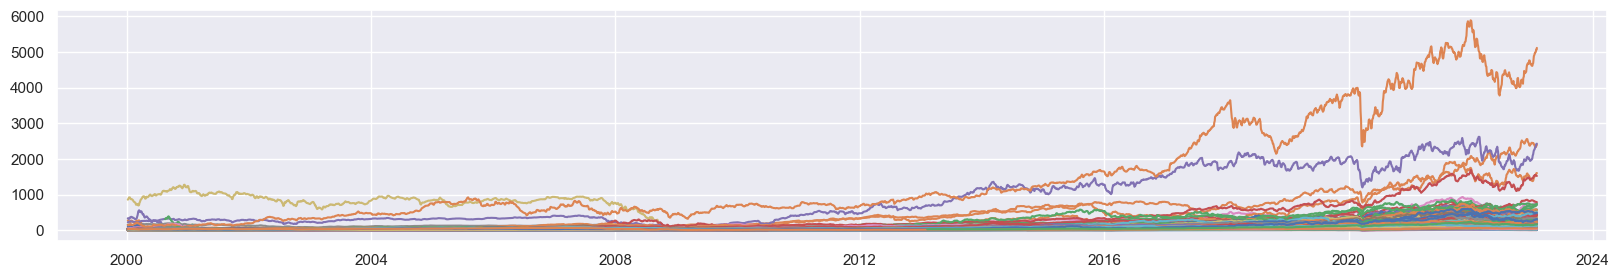

In [65]:
#Graficamos la media movil de las 500 empresas desde el año 2000 hasta el 2023. 
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(dataframe500['date'],dataframe500['Adj Close'].rolling(5).mean()); #media movil de los ultimos 5 periodos.
plt.show()

In [66]:
#Extraemos la informacion de las empresas, de otra tabla
wikiurl="https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
# parse data from the html into a beautifulsoup object
soup = bs.BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable"})
df=pd.read_html(str(indiatable))
# convert list to dataframe
df=pd.DataFrame(df[0])


In [67]:
df.head()


Symbol     Security             GICS Sector               GICS Sub-Industry  \
0    MMM           3M             Industrials        Industrial Conglomerates   
1    AOS  A. O. Smith             Industrials               Building Products   
2    ABT       Abbott             Health Care           Health Care Equipment   
3   ABBV       AbbVie             Health Care                 Pharmaceuticals   
4    ACN    Accenture  Information Technology  IT Consulting & Other Services   

     Headquarters Location  Date added      CIK      Founded  
0    Saint Paul, Minnesota  1957-03-04    66740         1902  
1     Milwaukee, Wisconsin  2017-07-26    91142         1916  
2  North Chicago, Illinois  1957-03-04     1800         1888  
3  North Chicago, Illinois  2012-12-31  1551152  2013 (1888)  
4          Dublin, Ireland  2011-07-06  1467373         1989

In [68]:
#Creo una lista que guardará las empresas seleccionadas.
SelectedSymbols = []

In [69]:
#Calculamos la media movil para cada año
MediaMovilAdjClose = data_analysis['Adj Close'].rolling(5).mean() # 2019,2020,2021,2022.
MediaMovil2019 = data2019['Adj Close'].rolling(5).mean()
MediaMovil2020 = data2020['Adj Close'].rolling(5).mean()
MediaMovil2021 = data2021['Adj Close'].rolling(5).mean()
MediaMovil2022 = data2022['Adj Close'].rolling(5).mean()

In [70]:
#Queremos saber a qué sectores pertenecen las empresas. 
df['GICS Sector'].value_counts()

Information Technology    76
Industrials               70
Financials                67
Health Care               64
Consumer Discretionary    56
Consumer Staples          33
Utilities                 30
Real Estate               30
Materials                 29
Communication Services    25
Energy                    23
Name: GICS Sector, dtype: int64

<AxesSubplot: xlabel='Date'>

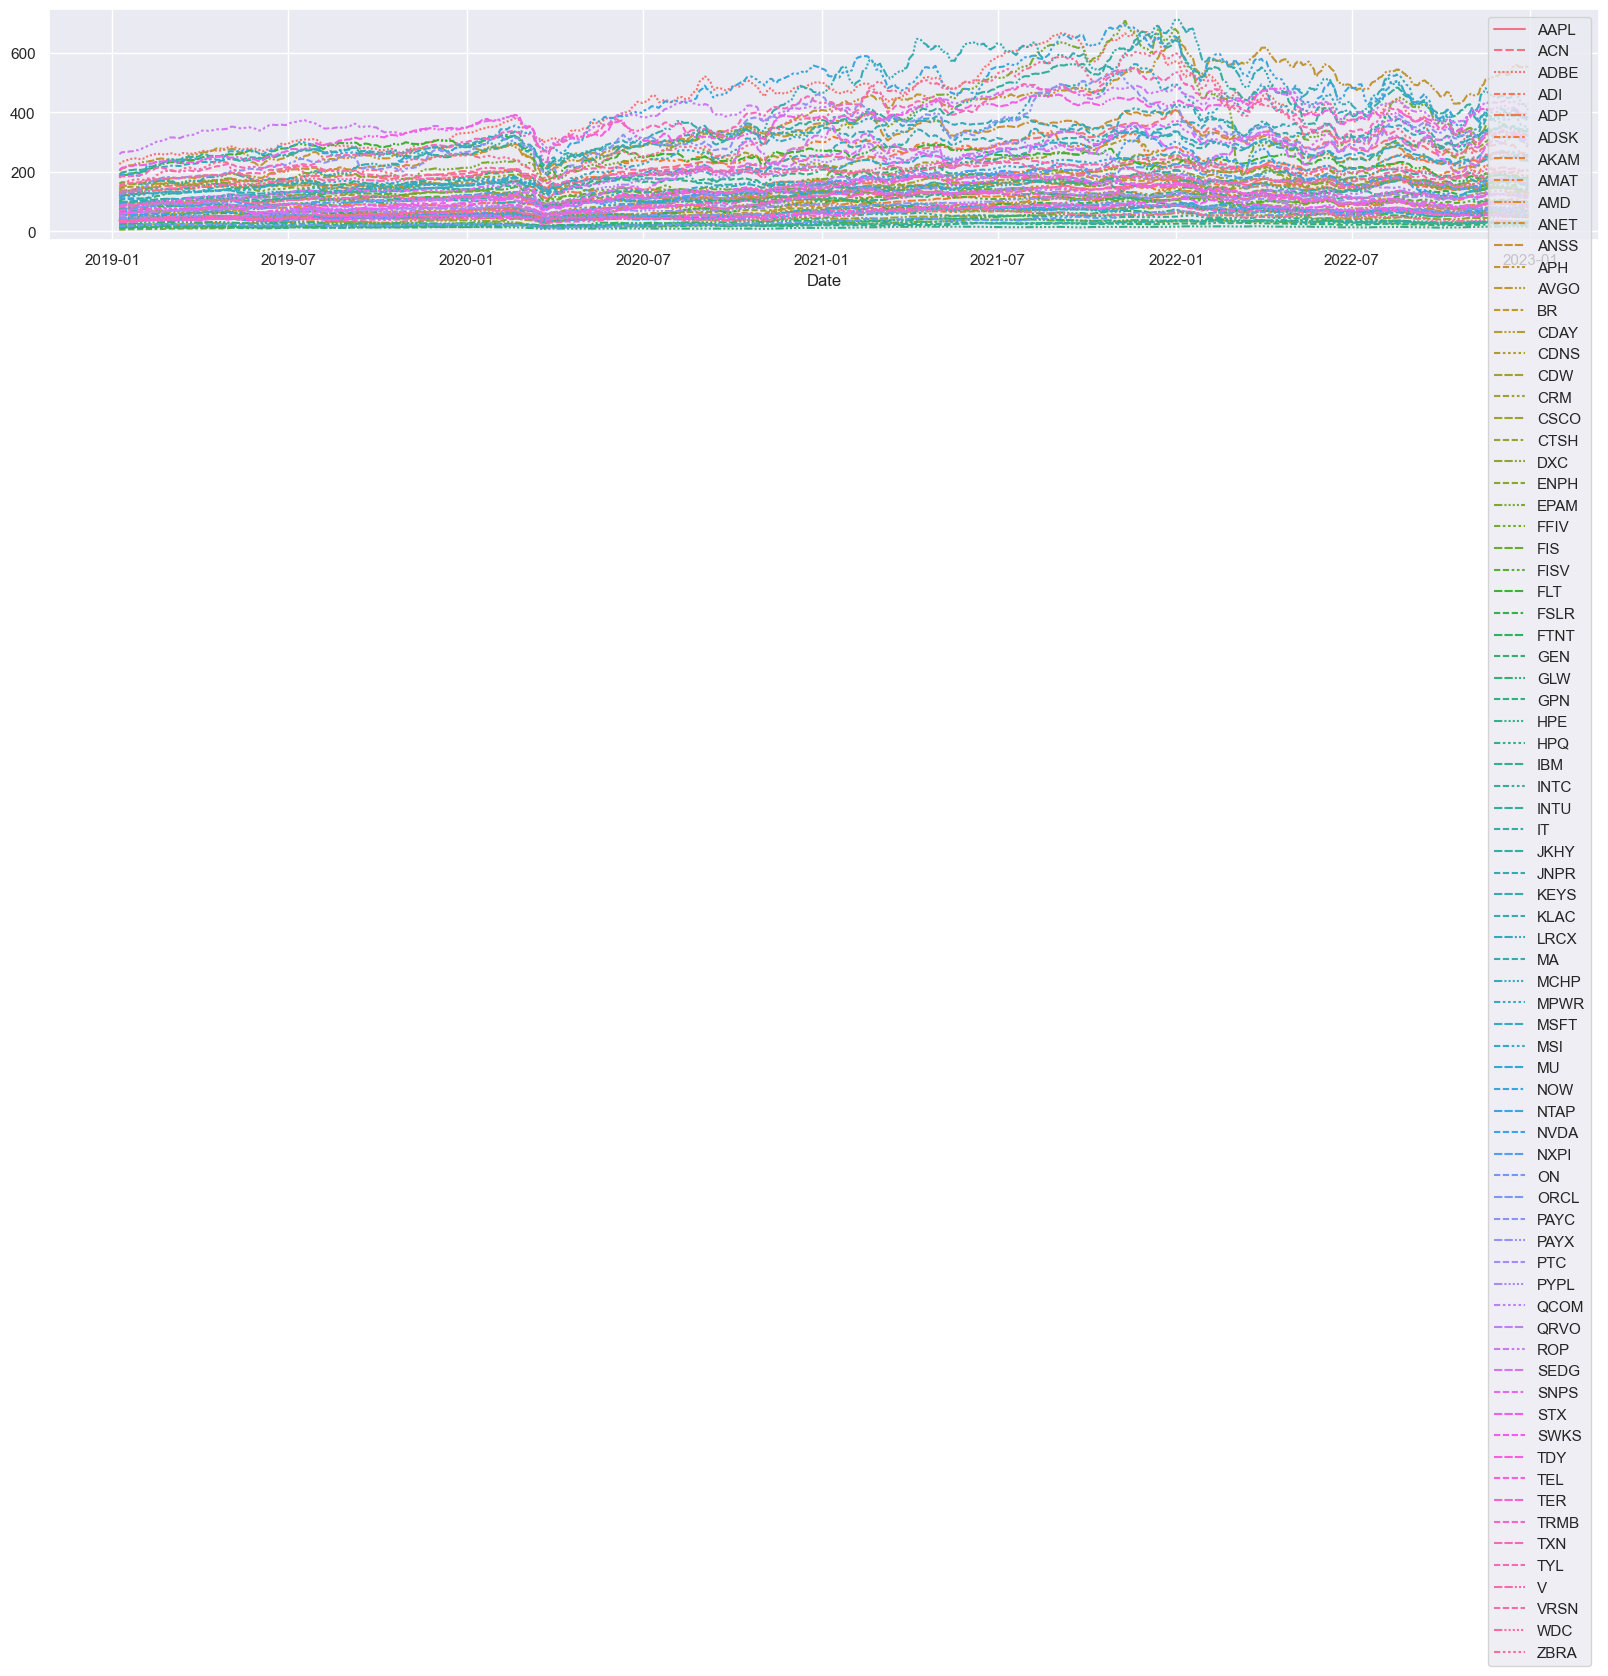

In [71]:
# Graficamos la media movil de las empresas de información
df_tech = df[df['GICS Sector']=='Information Technology']
ItSymbols = df_tech['Symbol'].to_list()
MediamovilIt = MediaMovilAdjClose[MediaMovilAdjClose.columns.intersection(ItSymbols)]
sns.lineplot(data=MediamovilIt)


In [72]:
Mediamovil2019It = MediaMovil2019[MediaMovil2019.columns.intersection(ItSymbols)]
Promedio2019It = Mediamovil2019It.mean()
Mediamovil2020It = MediaMovil2020[MediaMovil2020.columns.intersection(ItSymbols)]
Promedio2020It = Mediamovil2020It.mean()
Mediamovil2021It = MediaMovil2021[MediaMovil2021.columns.intersection(ItSymbols)]
Promedio2021It = Mediamovil2021It.mean()
Mediamovil2022It = MediaMovil2022[MediaMovil2022.columns.intersection(ItSymbols)]
Promedio2022It = Mediamovil2022It.mean()

A continuación usaremos la librería plotly, que sirve para generar gráficos interactivos.
#pip install plotly. 

In [73]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode

In [74]:
trace1 = go.Bar(
    x=Promedio2019It.index[0:30],
    y=Promedio2019It[0:30],
    name='2019',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Bar(
    x=Promedio2020It.index[0:30],
    y=Promedio2020It[0:30],
    name='2020',
    yaxis='y2'

)
trace3 = go.Bar(
    x=Promedio2021It.index[0:30],
    y=Promedio2021It[0:30],
    name='2021',
    yaxis='y3'

)
trace4 = go.Bar(
    x=Promedio2022It.index[0:30],
    y=Promedio2022It[0:30],
    name='2022',
    yaxis='y3'
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.add_trace(trace3,secondary_y=True)
fig.add_trace(trace4,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = 'AdjClose promedio-IT',xaxis=dict(
      tickangle=-90
    ))
iplot(fig)

Analizaremos AAPL y ENPH.

In [75]:
SelectedSymbols.append('AAPL')
SelectedSymbols.append('ENPH')

In [24]:
trace1 = go.Bar(
    x=Promedio2019It.index[31:76],
    y=Promedio2019It[31:76],
    name='2019',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Bar(
    x=Promedio2020It.index[31:76],
    y=Promedio2020It[31:76],
    name='2020',
    yaxis='y2'

)
trace3 = go.Bar(
    x=Promedio2021It.index[31:76],
    y=Promedio2021It[31:76],
    name='2021',
    yaxis='y3'

)
trace4 = go.Bar(
    x=Promedio2022It.index[31:76],
    y=Promedio2022It[31:76],
    name='2022',
    yaxis='y3'
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.add_trace(trace3,secondary_y=True)
fig.add_trace(trace4,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = 'AdjClose promedio-IT2',xaxis=dict(
      tickangle=-90
    ))
iplot(fig)

Analizaremos MPWR, SNPS y SEDG. Empresas cuyos promedios han aumentado en el 2021, 2022, frente al 2019, 2020.

In [25]:
SelectedSymbols.append('MPWR')
SelectedSymbols.append('SNPS')
SelectedSymbols.append('SEDG')

Analizaremos Industrials.

<AxesSubplot: xlabel='Date'>

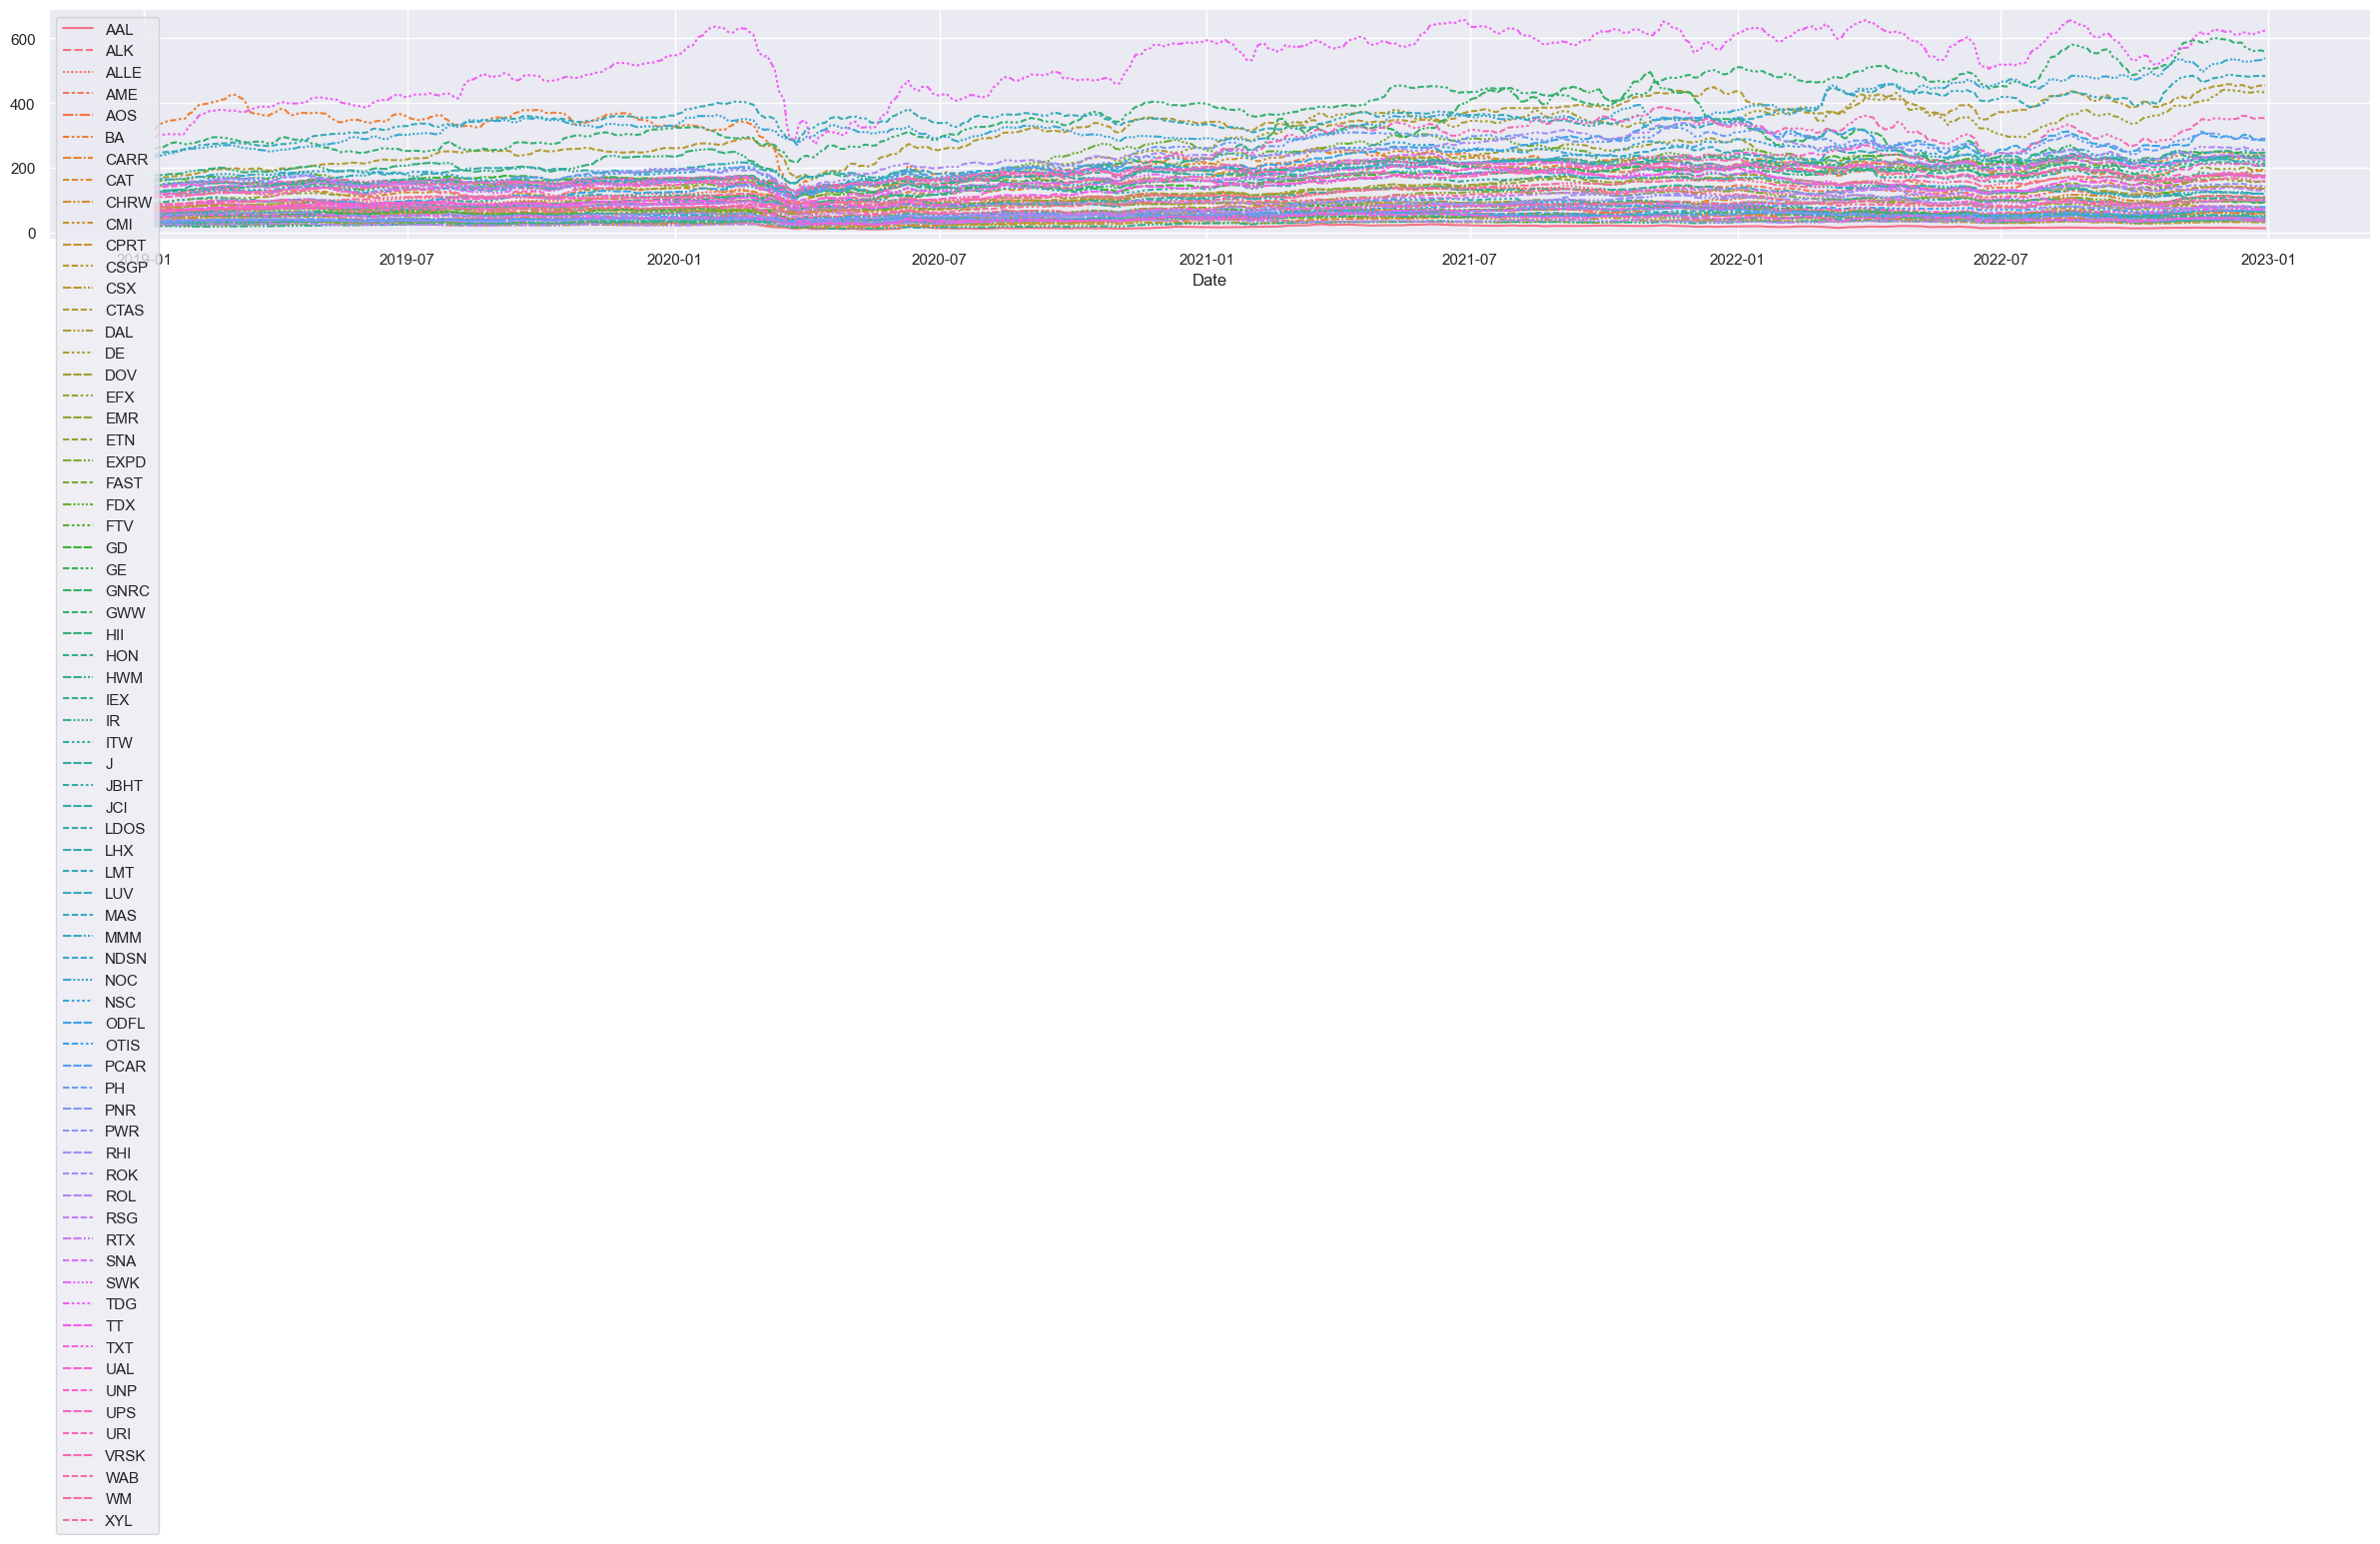

In [26]:
df_Ind = df[df['GICS Sector']=='Industrials']
INDSymbols = df_Ind['Symbol'].to_list()
#MediaMovilIND = dataframe['Adj Close'].rolling(5).mean()
sns.lineplot(data=MediaMovilAdjClose[MediaMovilAdjClose.columns.intersection(INDSymbols)])

In [27]:
Mediamovil2019In = MediaMovil2019[MediaMovil2019.columns.intersection(INDSymbols)]
Promedio2019In = Mediamovil2019In.mean()
Mediamovil2020In = MediaMovil2020[MediaMovil2020.columns.intersection(INDSymbols)]
Promedio2020In = Mediamovil2020In.mean()
Mediamovil2021In = MediaMovil2021[MediaMovil2021.columns.intersection(INDSymbols)]
Promedio2021In = Mediamovil2021In.mean()
Mediamovil2022In = MediaMovil2022[MediaMovil2022.columns.intersection(INDSymbols)]
Promedio2022In = Mediamovil2022In.mean()

In [28]:
trace1 = go.Bar(
    x=Promedio2019In.index[0:30],
    y=Promedio2019In[0:30],
    name='2019',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Bar(
    x=Promedio2020In.index[0:30],
    y=Promedio2020In[0:30],
    name='2020',
    yaxis='y2'

)
trace3 = go.Bar(
    x=Promedio2021In.index[0:30],
    y=Promedio2021In[0:30],
    name='2021',
    yaxis='y3'

)
trace4 = go.Bar(
    x=Promedio2022In.index[0:30],
    y=Promedio2022In[0:30],
    name='2022',
    yaxis='y3'
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.add_trace(trace3,secondary_y=True)
fig.add_trace(trace4,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = 'AdjClose promedio-Ind',xaxis=dict(
      tickangle=-90
    ))
iplot(fig)

Analizaremos GWW,DE,CTAS.

In [29]:
SelectedSymbols.append('GWW')
SelectedSymbols.append('DE')
SelectedSymbols.append('CTAS')

In [30]:
trace1 = go.Bar(
    x=Promedio2019In.index[31:76],
    y=Promedio2019In[31:76],
    name='2019',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Bar(
    x=Promedio2020In.index[31:76],
    y=Promedio2020In[31:76],
    name='2020',
    yaxis='y2'

)
trace3 = go.Bar(
    x=Promedio2021In.index[31:76],
    y=Promedio2021In[31:76],
    name='2021',
    yaxis='y3'

)
trace4 = go.Bar(
    x=Promedio2022In.index[31:76],
    y=Promedio2022In[31:76],
    name='2022',
    yaxis='y3'
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.add_trace(trace3,secondary_y=True)
fig.add_trace(trace4,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = 'AdjClose promedio-Ind',xaxis=dict(
      tickangle=-90
    ))
iplot(fig)

Analizaremos URI y ODFL.

In [31]:
SelectedSymbols.append('URI')
SelectedSymbols.append('ODFL')

Analizaremos Financials.

<AxesSubplot: xlabel='Date'>

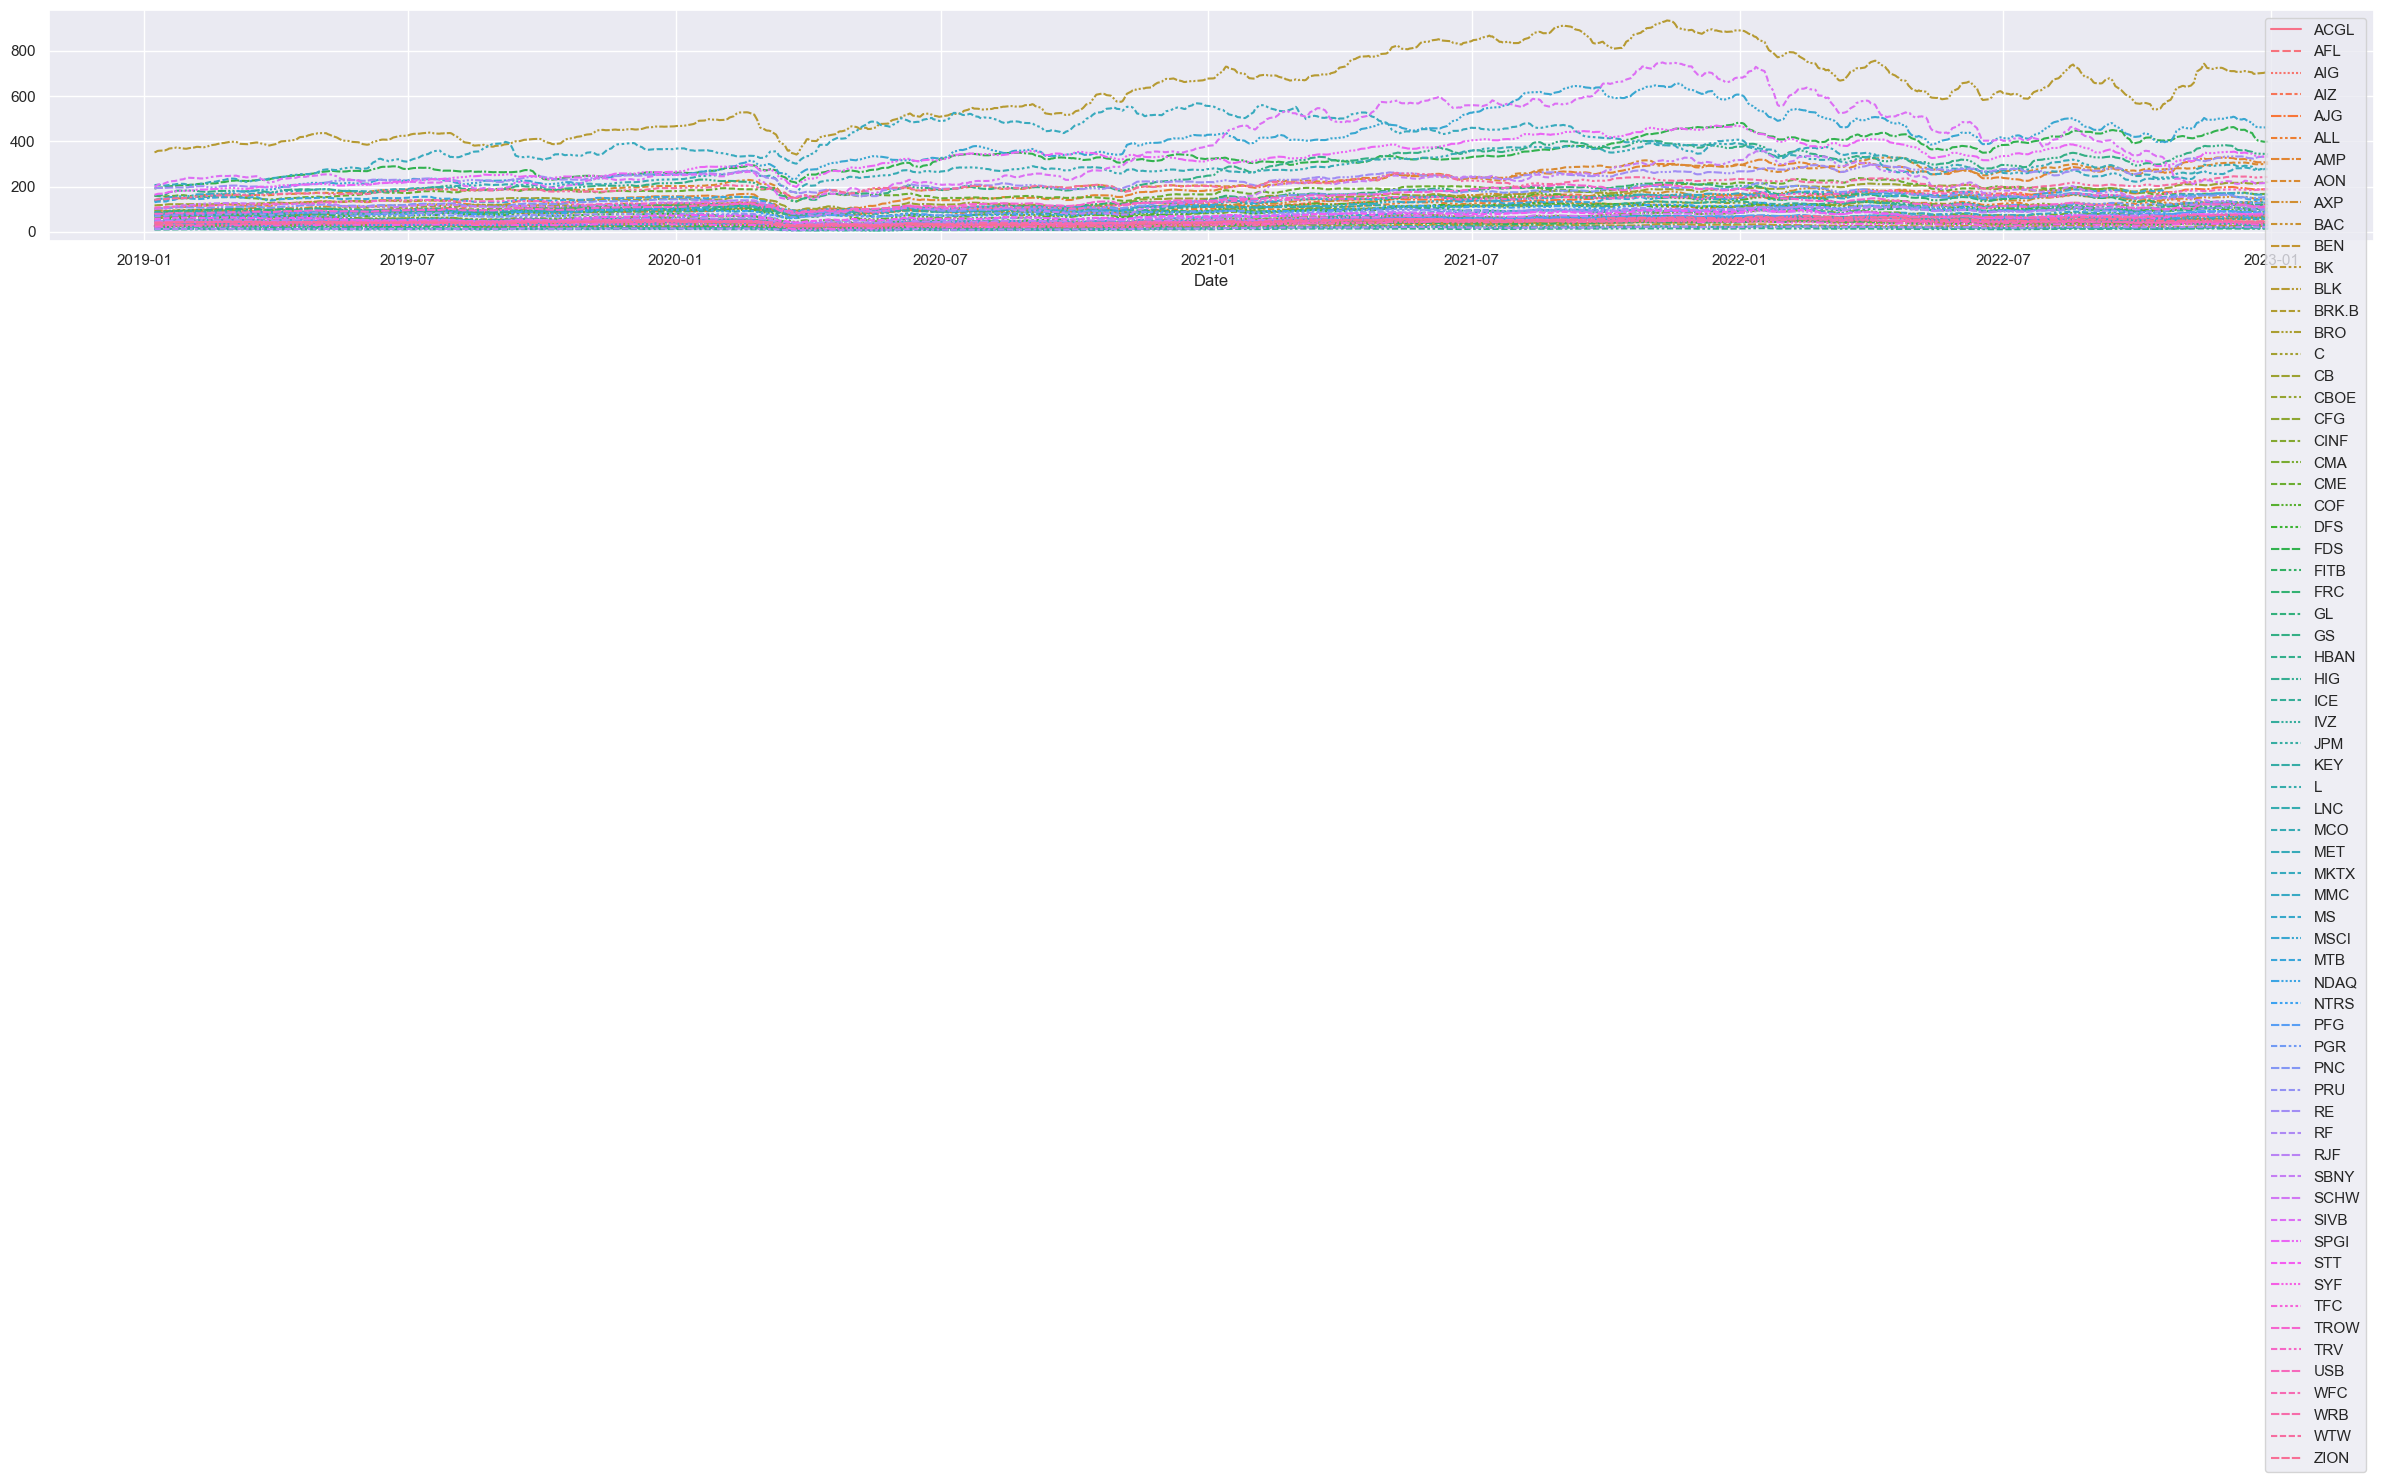

In [32]:
df_Fin = df[df['GICS Sector']=='Financials']
FinSymbols = df_Fin['Symbol'].to_list()
#MediaMovilIND = dataframe['Adj Close'].rolling(5).mean()
sns.lineplot(data=MediaMovilAdjClose[MediaMovilAdjClose.columns.intersection(FinSymbols)])

In [33]:
Mediamovil2019Fin = MediaMovil2019[MediaMovil2019.columns.intersection(FinSymbols)]
Promedio2019Fin = Mediamovil2019Fin.mean()
Mediamovil2020Fin = MediaMovil2020[MediaMovil2020.columns.intersection(FinSymbols)]
Promedio2020Fin = Mediamovil2020Fin.mean()
Mediamovil2021Fin = MediaMovil2021[MediaMovil2021.columns.intersection(FinSymbols)]
Promedio2021Fin = Mediamovil2021Fin.mean()
Mediamovil2022Fin = MediaMovil2022[MediaMovil2022.columns.intersection(FinSymbols)]
Promedio2022Fin = Mediamovil2022Fin.mean()


In [34]:
trace1 = go.Bar(
    x=Promedio2019Fin.index[0:30],
    y=Promedio2019Fin[0:30],
    name='2019',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Bar(
    x=Promedio2020Fin.index[0:30],
    y=Promedio2020Fin[0:30],
    name='2020',
    yaxis='y2'

)
trace3 = go.Bar(
    x=Promedio2021Fin.index[0:30],
    y=Promedio2021Fin[0:30],
    name='2021',
    yaxis='y3'

)
trace4 = go.Bar(
    x=Promedio2022Fin.index[0:30],
    y=Promedio2022Fin[0:30],
    name='2022',
    yaxis='y4'
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.add_trace(trace3,secondary_y=True)
fig.add_trace(trace4,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = 'AdjClose promedio-Fin',xaxis=dict(
      tickangle=-90
    ))
iplot(fig)

Analizaremos AMP y AJG.

In [35]:
SelectedSymbols.append('AMP')
SelectedSymbols.append('AJG')

In [36]:
trace1 = go.Bar(
    x=Promedio2019Fin.index[31:76],
    y=Promedio2019Fin[31:76],
    name='2019',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Bar(
    x=Promedio2020Fin.index[31:76],
    y=Promedio2020Fin[31:76],
    name='2020',
    yaxis='y2'

)
trace3 = go.Bar(
    x=Promedio2021Fin.index[31:76],
    y=Promedio2021Fin[31:76],
    name='2021',
    yaxis='y3'

)
trace4 = go.Bar(
    x=Promedio2022Fin.index[31:76],
    y=Promedio2022Fin[31:76],
    name='2022',
    yaxis='y4'
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.add_trace(trace3,secondary_y=True)
fig.add_trace(trace4,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = 'AdjClose promedio-Fin',xaxis=dict(
      tickangle=-90
    ))
iplot(fig)

Analizaremos MSCI.

In [37]:
SelectedSymbols.append('MSCI')

Analizaremos las empresas de Health Care.

<AxesSubplot: xlabel='Date'>

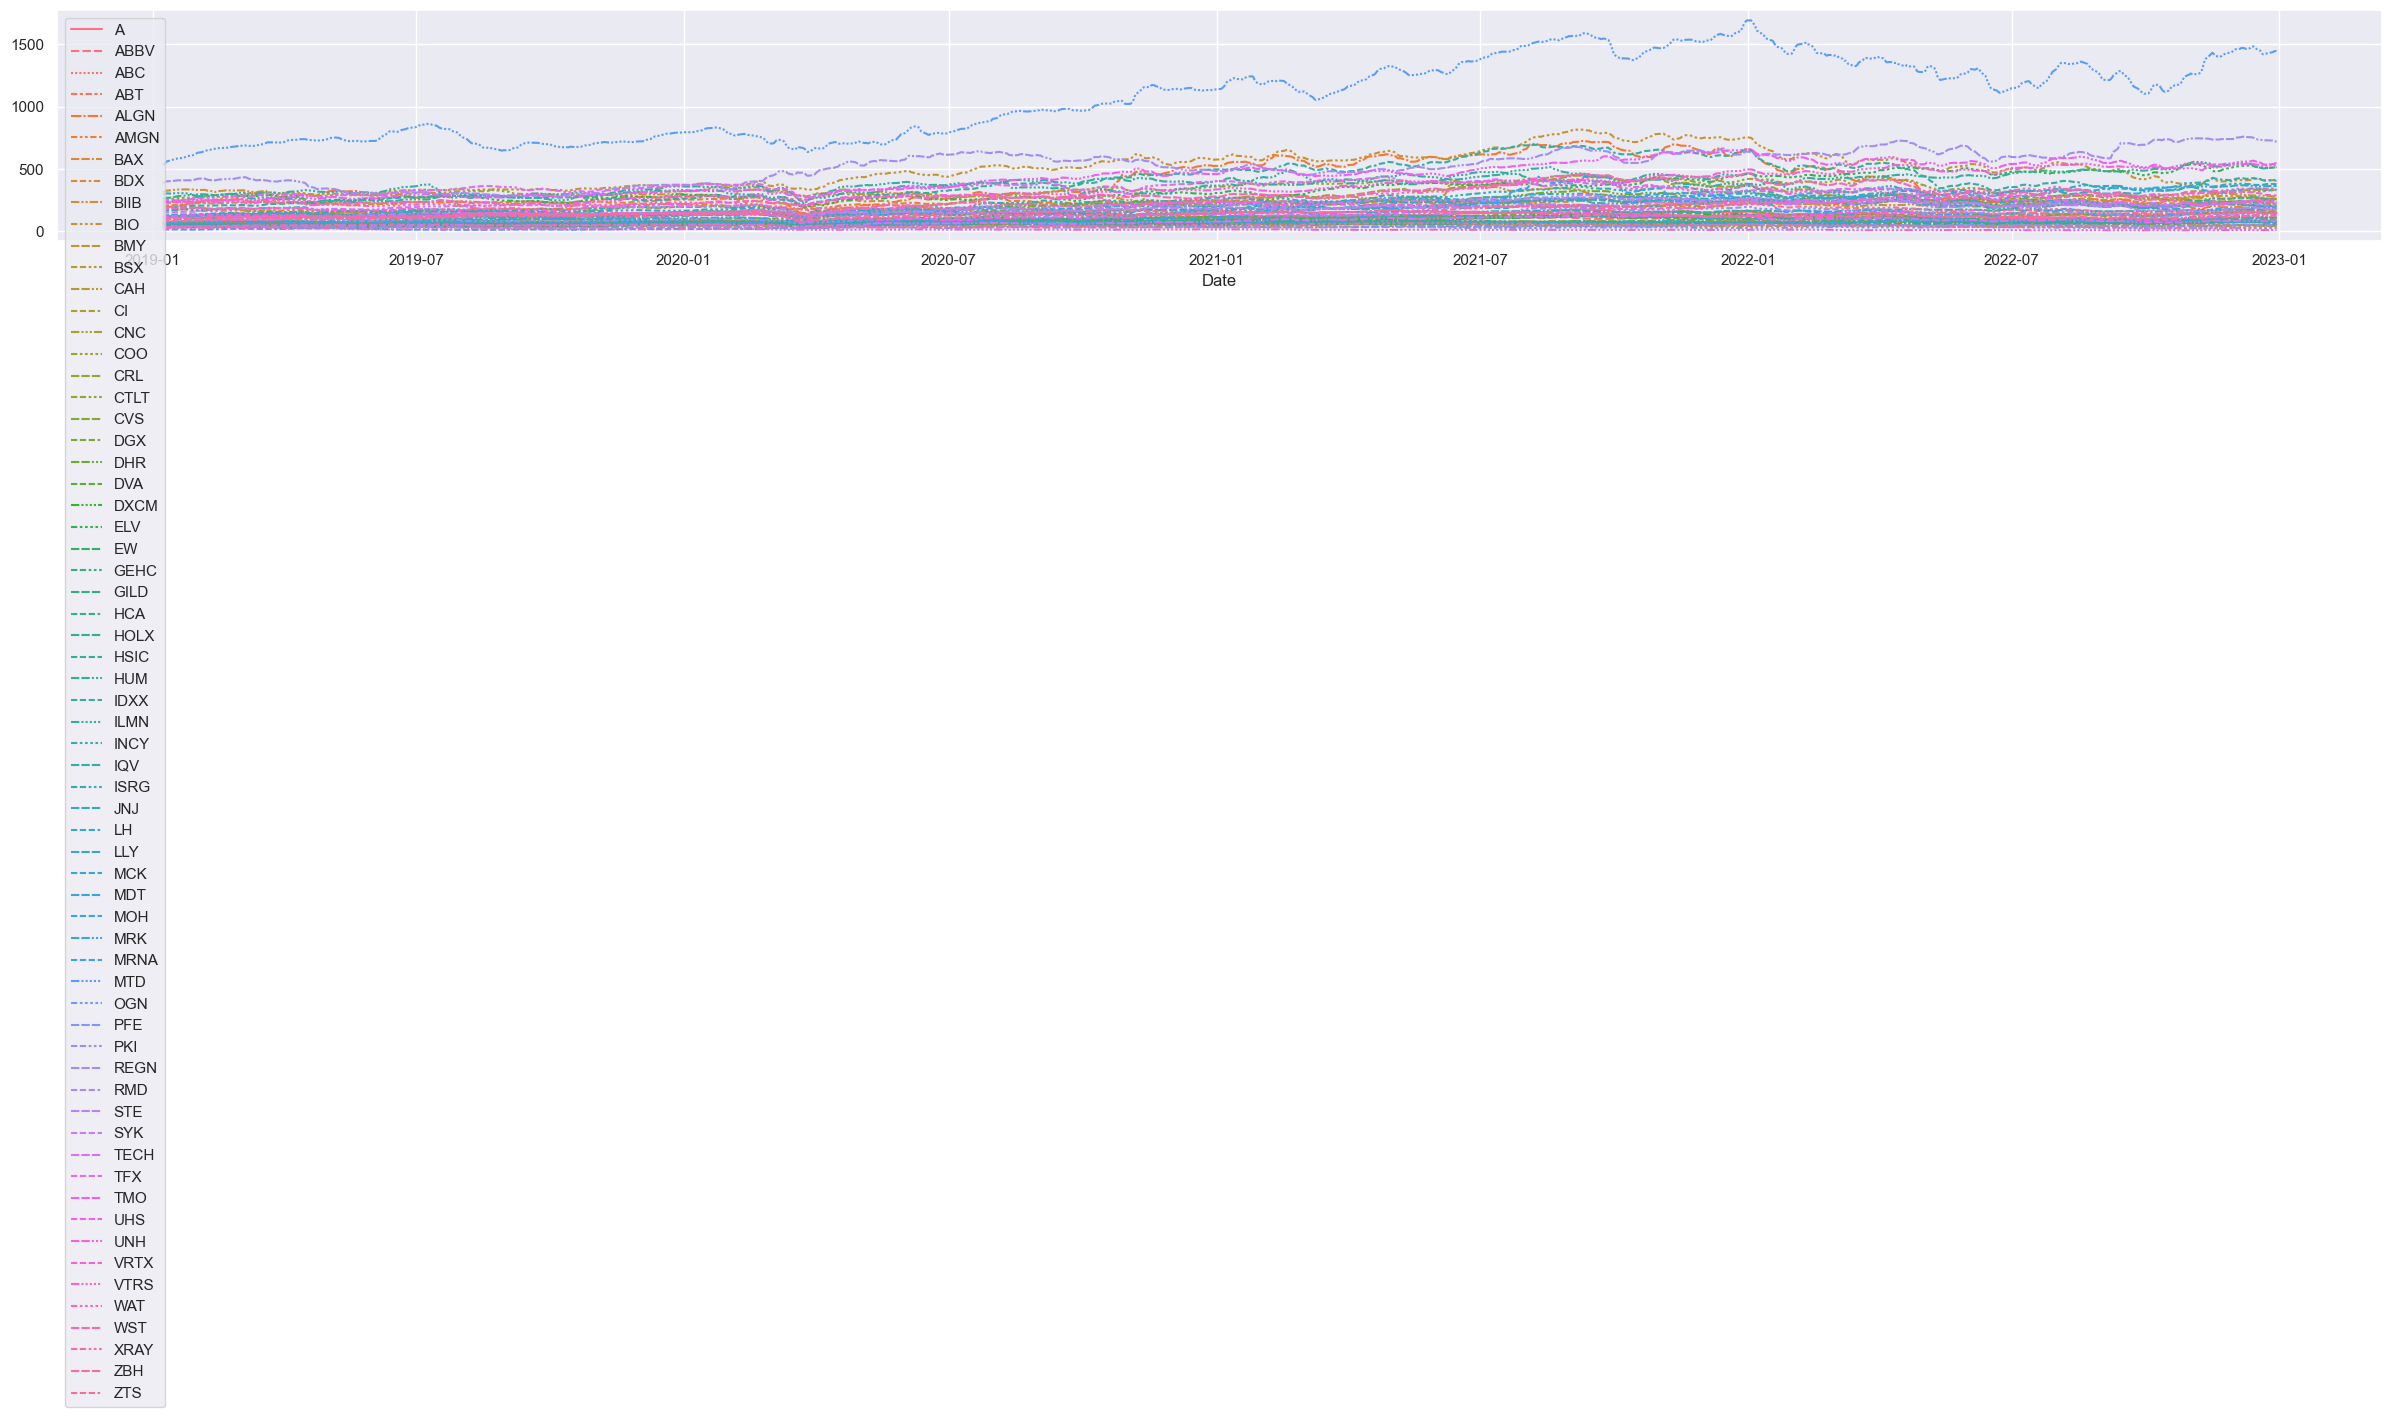

In [38]:
# Graficamos la media movil de las empresas de healthcare
df_health = df[df['GICS Sector']=='Health Care']
HcSymbols = df_health['Symbol'].to_list()
sns.lineplot(data=MediaMovilAdjClose[MediaMovilAdjClose.columns.intersection(HcSymbols)])

In [39]:
Mediamovil2019Hc = MediaMovil2019[MediaMovil2019.columns.intersection(HcSymbols)]
Promedio2019Hc = Mediamovil2019Hc.mean()
Mediamovil2020Hc = MediaMovil2020[MediaMovil2020.columns.intersection(HcSymbols)]
Promedio2020Hc = Mediamovil2020Hc.mean()
Mediamovil2021Hc = MediaMovil2021[MediaMovil2021.columns.intersection(HcSymbols)]
Promedio2021Hc = Mediamovil2021Hc.mean()
Mediamovil2022Hc = MediaMovil2022[MediaMovil2022.columns.intersection(HcSymbols)]
Promedio2022Hc = Mediamovil2022Hc.mean()

In [40]:
trace1 = go.Bar(
    x=Promedio2019Hc.index[0:30],
    y=Promedio2019Hc[0:30],
    name='2019',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Bar(
    x=Promedio2020Hc.index[0:30],
    y=Promedio2020Hc[0:30],
    name='2020',
    yaxis='y2'

)
trace3 = go.Bar(
    x=Promedio2021Hc.index[0:30],
    y=Promedio2021Hc[0:30],
    name='2021',
    yaxis='y3'

)
trace4 = go.Bar(
    x=Promedio2022Hc.index[0:30],
    y=Promedio2022Hc[0:30],
    name='2022',
    yaxis='y4'
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.add_trace(trace3,secondary_y=True)
fig.add_trace(trace4,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = 'AdjClose promedio-Hc',xaxis=dict(
      tickangle=-90
    ))
iplot(fig)

In [41]:
trace1 = go.Bar(
    x=Promedio2019Hc.index[31:76],
    y=Promedio2019Hc[31:76],
    name='2019',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Bar(
    x=Promedio2020Hc.index[31:76],
    y=Promedio2020Hc[31:76],
    name='2020',
    yaxis='y2'

)
trace3 = go.Bar(
    x=Promedio2021Hc.index[31:76],
    y=Promedio2021Hc[31:76],
    name='2021',
    yaxis='y3'

)
trace4 = go.Bar(
    x=Promedio2022Hc.index[31:76],
    y=Promedio2022Hc[31:76],
    name='2022',
    yaxis='y4'
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.add_trace(trace3,secondary_y=True)
fig.add_trace(trace4,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = 'AdjClose promedio-Hc',xaxis=dict(
      tickangle=-90
    ))
iplot(fig)

Analizaremos MOH, LLY, MCK, WST.

In [42]:
SelectedSymbols.append('MOH')
SelectedSymbols.append('LLY')
SelectedSymbols.append('MCK')
SelectedSymbols.append('WST')

Consumer Discretionary

<AxesSubplot: xlabel='Date'>

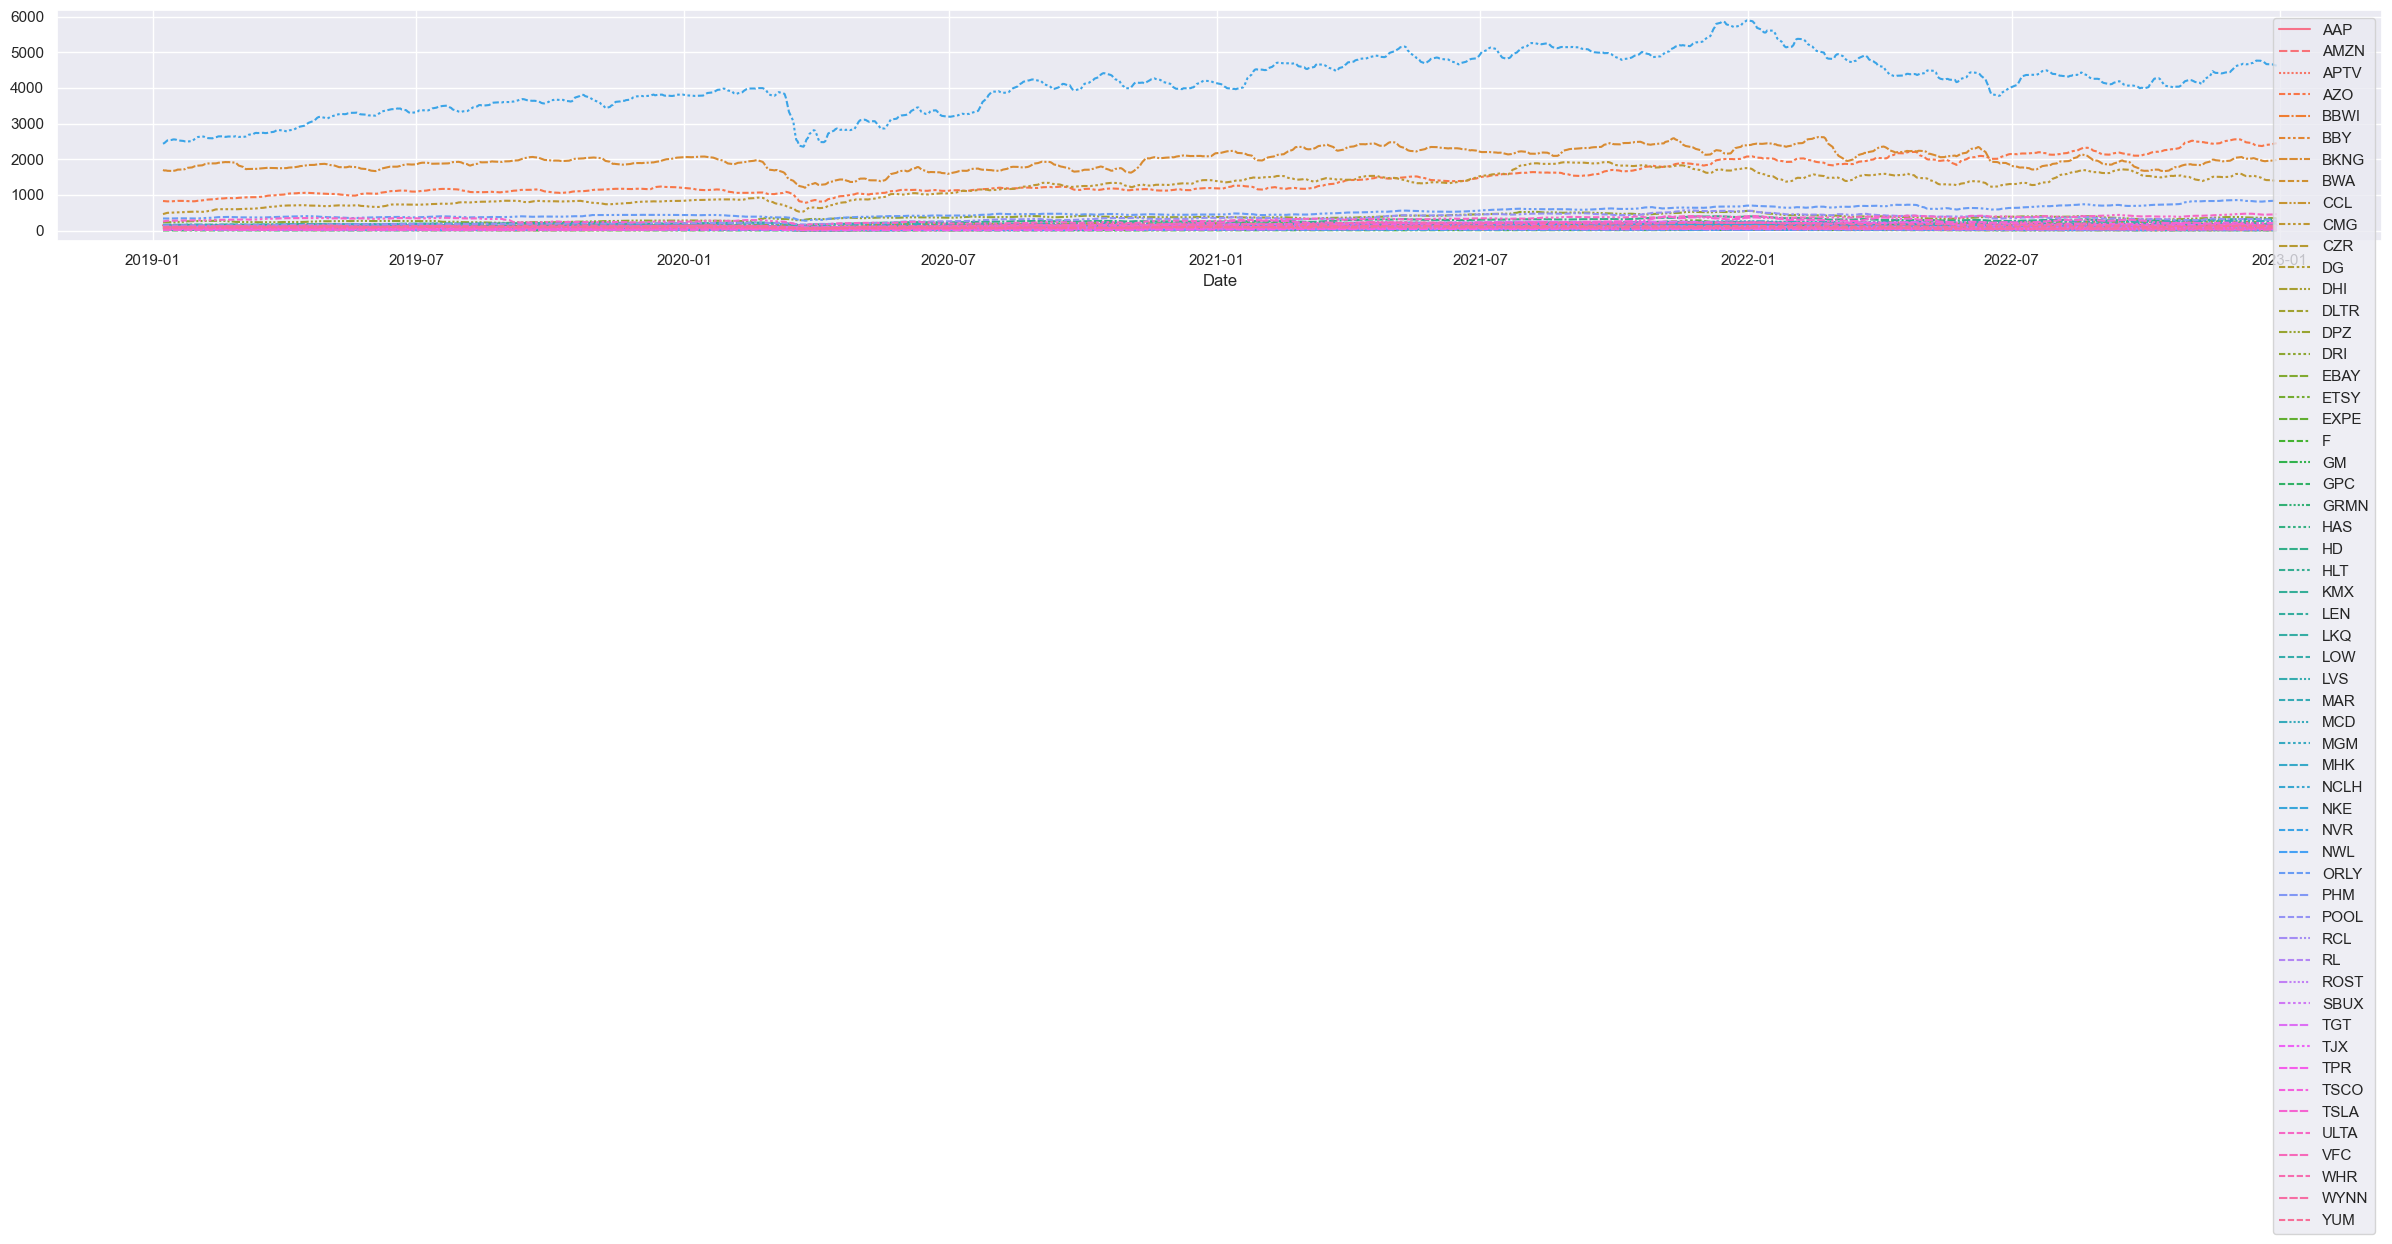

In [43]:
# Graficamos la media movil de las empresas
df_cd = df[df['GICS Sector']=='Consumer Discretionary']
CdSymbols = df_cd['Symbol'].to_list()
MediamovilCd =  MediaMovilAdjClose[MediaMovilAdjClose.columns.intersection(CdSymbols)]
sns.lineplot(data=MediamovilCd)

In [44]:
Mediamovil2019Cd = MediaMovil2019[MediaMovil2019.columns.intersection(CdSymbols)]
Promedio2019Cd = Mediamovil2019Cd.mean()
Mediamovil2020Cd = MediaMovil2020[MediaMovil2020.columns.intersection(CdSymbols)]
Promedio2020Cd = Mediamovil2020Cd.mean()
Mediamovil2021Cd = MediaMovil2021[MediaMovil2021.columns.intersection(CdSymbols)]
Promedio2021Cd = Mediamovil2021Cd.mean()
Mediamovil2022Cd = MediaMovil2022[MediaMovil2022.columns.intersection(CdSymbols)]
Promedio2022Cd = Mediamovil2022Cd.mean()

In [45]:
trace1 = go.Bar(
    x=Promedio2019Cd.index[0:30],
    y=Promedio2019Cd[0:30],
    name='2019',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Bar(
    x=Promedio2020Cd.index[0:30],
    y=Promedio2020Cd[0:30],
    name='2020',
    yaxis='y2'

)
trace3 = go.Bar(
    x=Promedio2021Cd.index[0:30],
    y=Promedio2021Cd[0:30],
    name='2021',
    yaxis='y3'

)
trace4 = go.Bar(
    x=Promedio2022Cd.index[0:30],
    y=Promedio2022Cd[0:30],
    name='2022',
    yaxis='y4'
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.add_trace(trace3,secondary_y=True)
fig.add_trace(trace4,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = 'AdjClose promedio-Cd',xaxis=dict(
      tickangle=-90
    ))
iplot(fig)

Analizaremos AZO, CMG, LOW.

In [46]:
SelectedSymbols.append('AZO')
SelectedSymbols.append('CMG')
SelectedSymbols.append('LOW')

In [47]:
trace1 = go.Bar(
    x=Promedio2019Cd.index[31:76],
    y=Promedio2019Cd[31:76],
    name='2019',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Bar(
    x=Promedio2020Cd.index[31:76],
    y=Promedio2020Cd[31:76],
    name='2020',
    yaxis='y2'

)
trace3 = go.Bar(
    x=Promedio2021Cd.index[31:76],
    y=Promedio2021Cd[31:76],
    name='2021',
    yaxis='y3'

)
trace4 = go.Bar(
    x=Promedio2022Cd.index[31:76],
    y=Promedio2022Cd[31:76],
    name='2022',
    yaxis='y4'
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.add_trace(trace3,secondary_y=True)
fig.add_trace(trace4,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = 'AdjClose promedio-Cd',xaxis=dict(
      tickangle=-90
    ))
iplot(fig)

Analizaremos ORLY

In [48]:
SelectedSymbols.append('ORLY')

Consumer Staples

<AxesSubplot: xlabel='Date'>

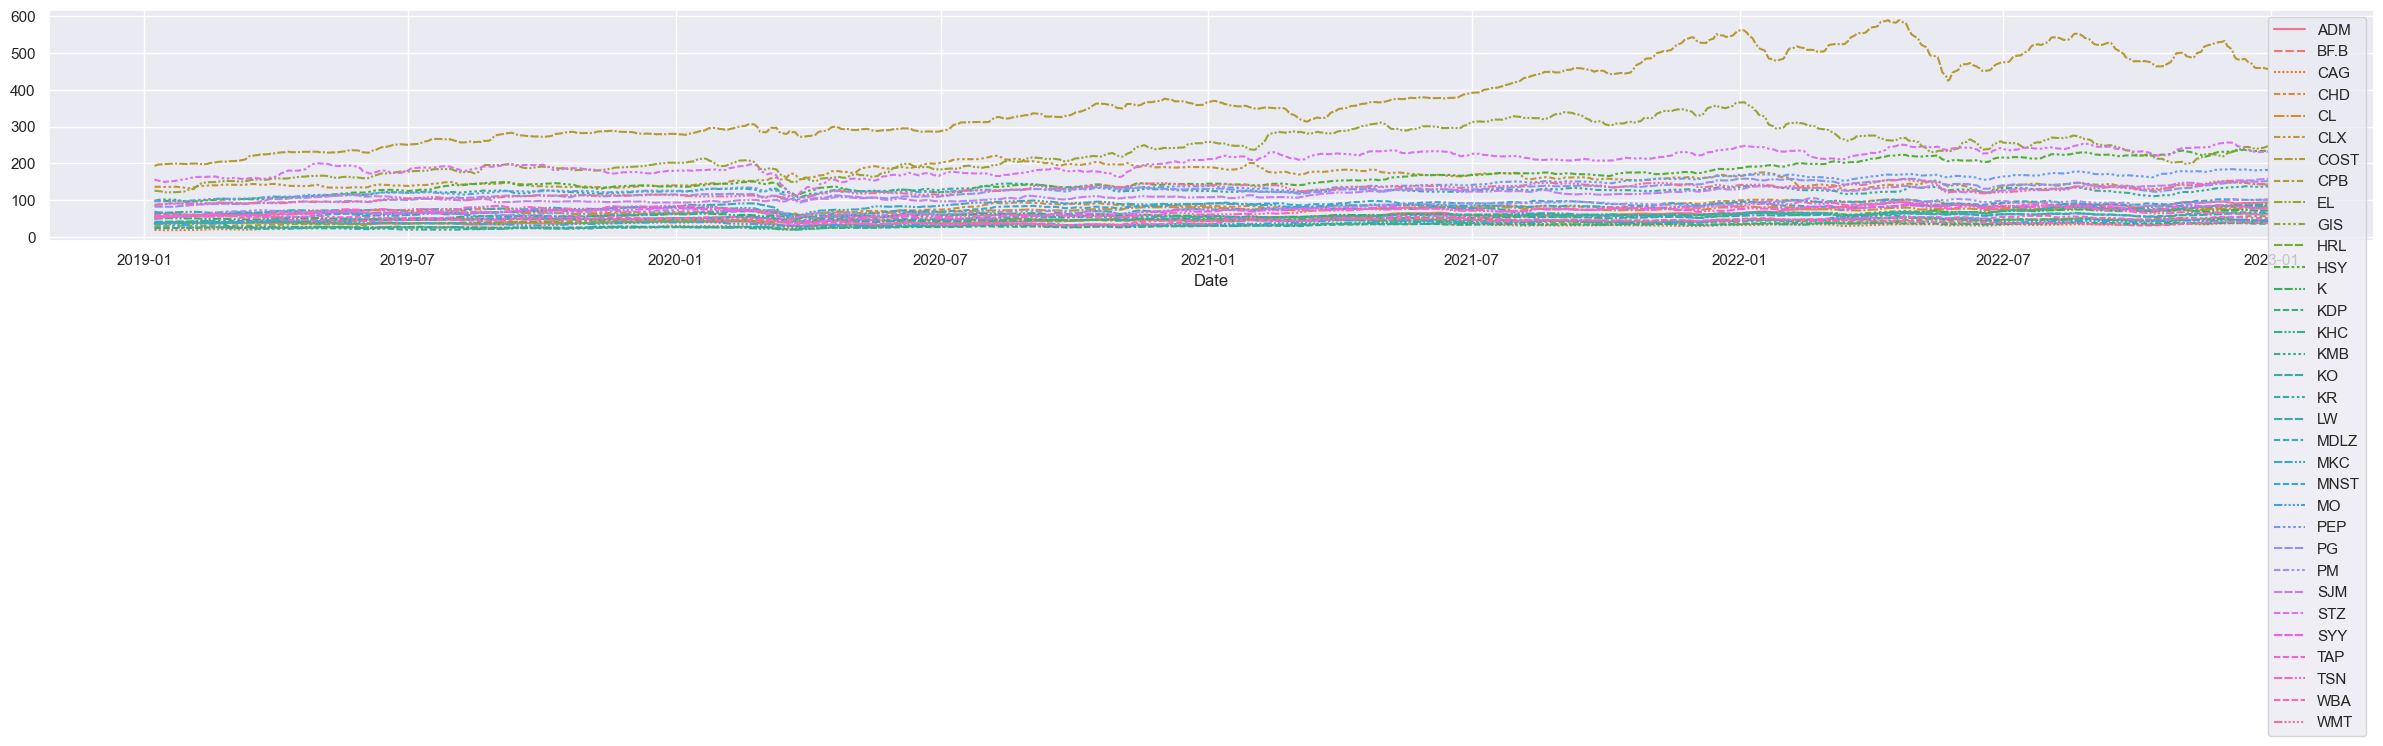

In [49]:
# Graficamos la media movil de las empresas
df_cs = df[df['GICS Sector']=='Consumer Staples']
CsSymbols = df_cs['Symbol'].to_list()
MediamovilCs =  MediaMovilAdjClose[MediaMovilAdjClose.columns.intersection(CsSymbols)]
sns.lineplot(data=MediamovilCs)

In [50]:
Mediamovil2019Cs = MediaMovil2019[MediaMovil2019.columns.intersection(CsSymbols)]
Promedio2019Cs = Mediamovil2019Cs.mean()
Mediamovil2020Cs = MediaMovil2020[MediaMovil2020.columns.intersection(CsSymbols)]
Promedio2020Cs = Mediamovil2020Cs.mean()
Mediamovil2021Cs = MediaMovil2021[MediaMovil2021.columns.intersection(CsSymbols)]
Promedio2021Cs = Mediamovil2021Cs.mean()
Mediamovil2022Cs = MediaMovil2022[MediaMovil2022.columns.intersection(CsSymbols)]
Promedio2022Cs = Mediamovil2022Cs.mean()

In [51]:
trace1 = go.Bar(
    x=Promedio2019Cs.index,
    y=Promedio2019Cs,
    name='2019',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Bar(
    x=Promedio2020Cs.index,
    y=Promedio2020Cs,
    name='2020',
    yaxis='y2'

)
trace3 = go.Bar(
    x=Promedio2021Cs.index,
    y=Promedio2021Cs,
    name='2021',
    yaxis='y3'

)
trace4 = go.Bar(
    x=Promedio2022Cs.index,
    y=Promedio2022Cs,
    name='2022',
    yaxis='y4'
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.add_trace(trace3,secondary_y=True)
fig.add_trace(trace4,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = 'AdjClose promedio-Cs',xaxis=dict(
      tickangle=-90
    ))
iplot(fig)

Analizaremos ADM.

In [52]:
SelectedSymbols.append('ADM')

Utilities

<AxesSubplot: xlabel='Date'>

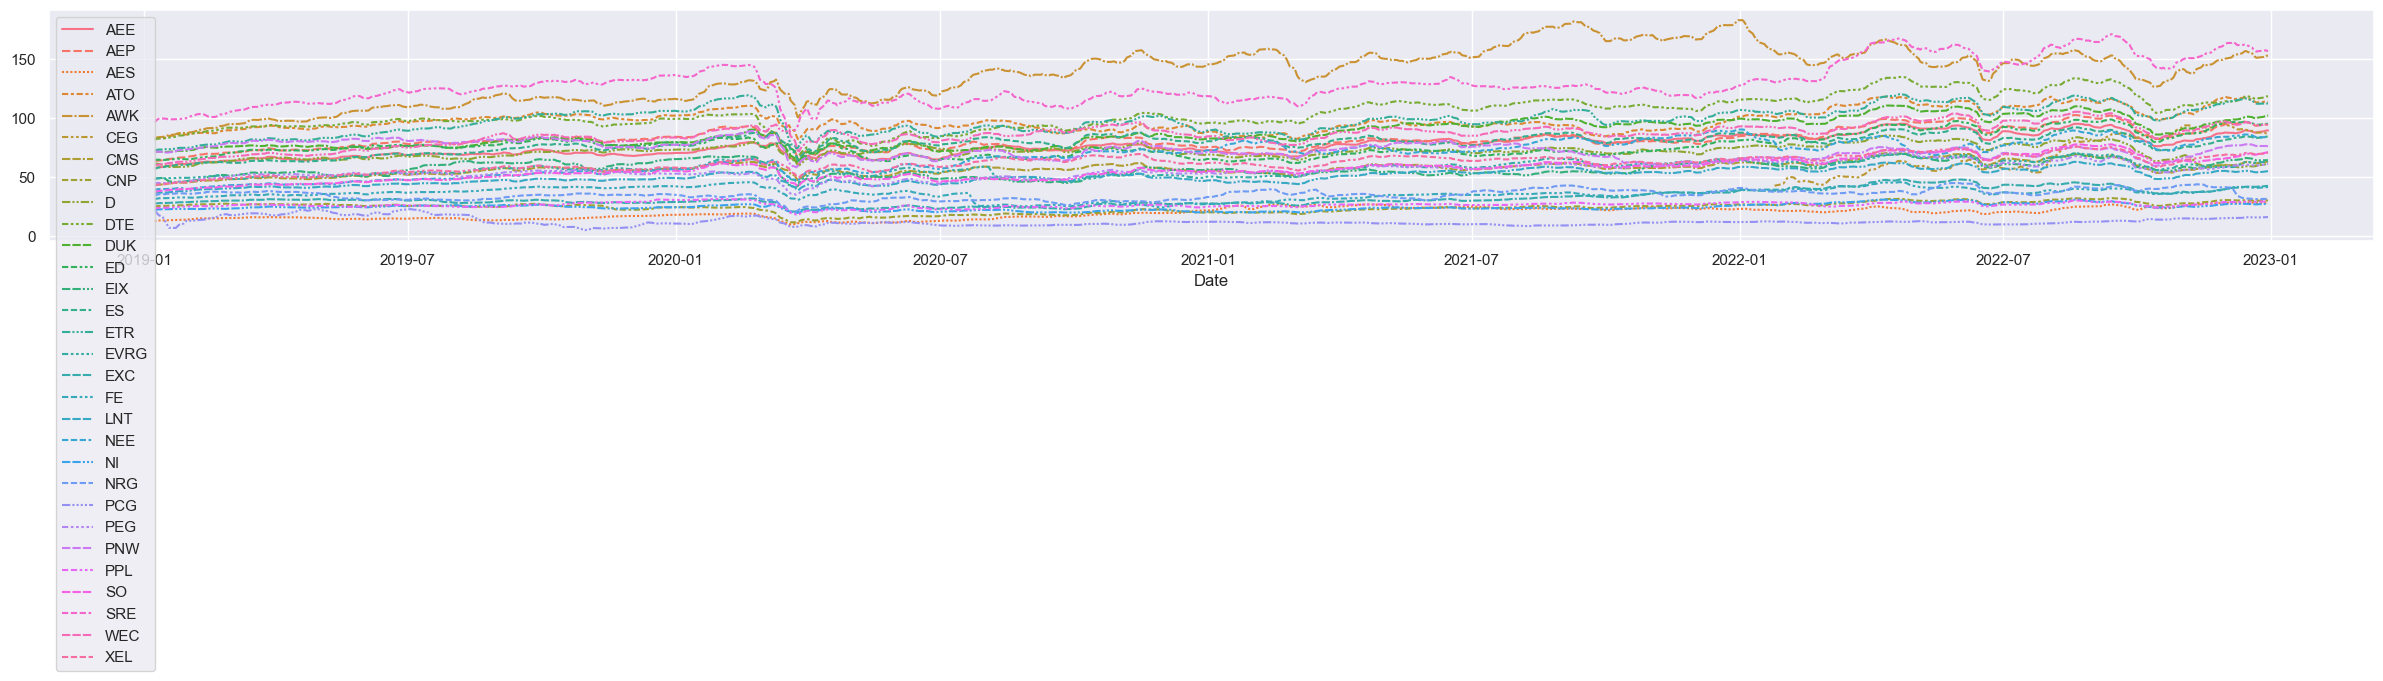

In [53]:
# Graficamos la media movil de las empresas
df_ut = df[df['GICS Sector']=='Utilities']
UtSymbols = df_ut['Symbol'].to_list()
MediamovilUt =  MediaMovilAdjClose[MediaMovilAdjClose.columns.intersection(UtSymbols)]
sns.lineplot(data=MediamovilUt)

In [54]:
Mediamovil2019Ut = MediaMovil2019[MediaMovil2019.columns.intersection(UtSymbols)]
Promedio2019Ut = Mediamovil2019Ut.mean()
Mediamovil2020Ut = MediaMovil2020[MediaMovil2020.columns.intersection(UtSymbols)]
Promedio2020Ut = Mediamovil2020Ut.mean()
Mediamovil2021Ut = MediaMovil2021[MediaMovil2021.columns.intersection(UtSymbols)]
Promedio2021Ut = Mediamovil2021Ut.mean()
Mediamovil2022Ut = MediaMovil2022[MediaMovil2022.columns.intersection(UtSymbols)]
Promedio2022Ut = Mediamovil2022Ut.mean()


In [55]:
trace1 = go.Bar(
    x=Promedio2019Ut.index,
    y=Promedio2019Ut,
    name='2019',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Bar(
    x=Promedio2020Ut.index,
    y=Promedio2020Ut,
    name='2020',
    yaxis='y2'

)
trace3 = go.Bar(
    x=Promedio2021Ut.index,
    y=Promedio2021Ut,
    name='2021',
    yaxis='y3'

)
trace4 = go.Bar(
    x=Promedio2022Ut.index,
    y=Promedio2022Ut,
    name='2022',
    yaxis='y4'
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.add_trace(trace3,secondary_y=True)
fig.add_trace(trace4,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = 'AdjClose promedio-Ut',xaxis=dict(
      tickangle=-90
    ))
iplot(fig)

Analizaremos NEE, AWK, AES.

In [56]:
SelectedSymbols.append('NEE')
SelectedSymbols.append('AWK')
SelectedSymbols.append('AES')

Real Estate

<AxesSubplot: xlabel='Date'>

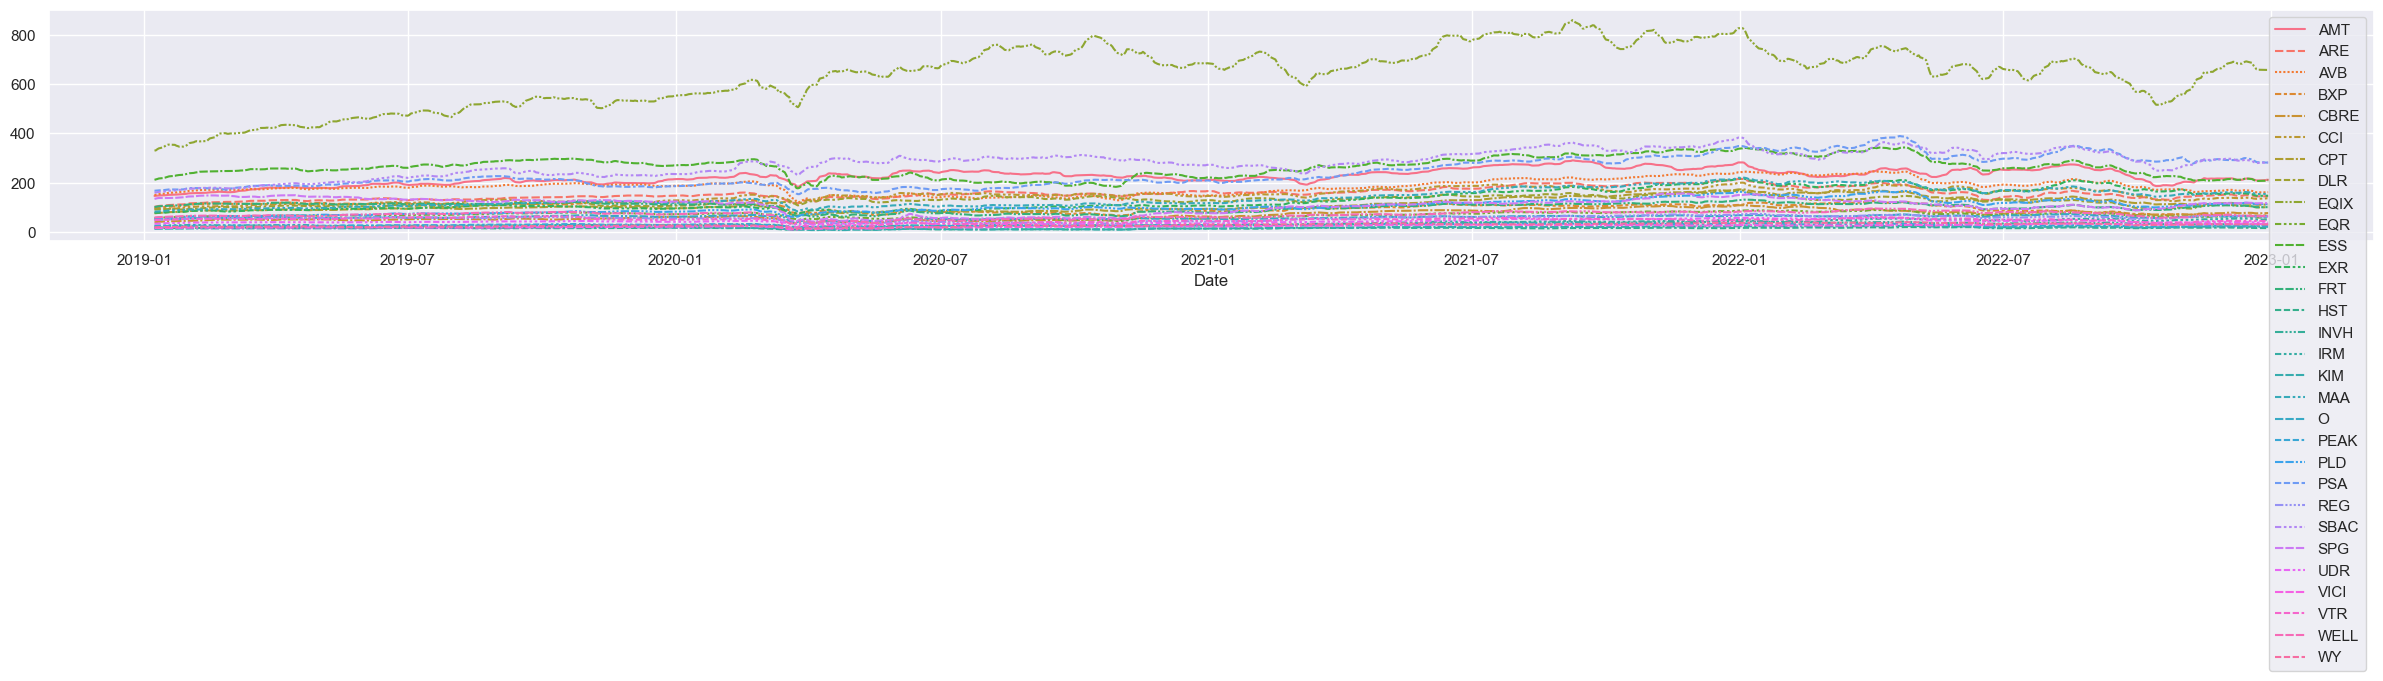

In [57]:
# Graficamos la media movil de las empresas
df_rs = df[df['GICS Sector']=='Real Estate']
RsSymbols = df_rs['Symbol'].to_list()
MediamovilRs =  MediaMovilAdjClose[MediaMovilAdjClose.columns.intersection(RsSymbols)]
sns.lineplot(data=MediamovilRs)

In [58]:
Mediamovil2019Rs = MediaMovil2019[MediaMovil2019.columns.intersection(RsSymbols)]
Promedio2019Rs = Mediamovil2019Rs.mean()
Mediamovil2020Rs = MediaMovil2020[MediaMovil2020.columns.intersection(RsSymbols)]
Promedio2020Rs = Mediamovil2020Rs.mean()
Mediamovil2021Rs = MediaMovil2021[MediaMovil2021.columns.intersection(RsSymbols)]
Promedio2021Rs = Mediamovil2021Rs.mean()
Mediamovil2022Rs = MediaMovil2022[MediaMovil2022.columns.intersection(RsSymbols)]
Promedio2022Rs = Mediamovil2022Rs.mean()


In [59]:
trace1 = go.Bar(
    x=Promedio2019Rs.index,
    y=Promedio2019Rs,
    name='2019',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Bar(
    x=Promedio2020Rs.index,
    y=Promedio2020Rs,
    name='2020',
    yaxis='y2'

)
trace3 = go.Bar(
    x=Promedio2021Rs.index,
    y=Promedio2021Rs,
    name='2021',
    yaxis='y3'

)
trace4 = go.Bar(
    x=Promedio2022Rs.index,
    y=Promedio2022Rs,
    name='2022',
    yaxis='y4'
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.add_trace(trace3,secondary_y=True)
fig.add_trace(trace4,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = 'AdjClose promedio-Rs',xaxis=dict(
      tickangle=-90
    ))
iplot(fig)

Analizaremos EXR.

In [60]:
SelectedSymbols.append('EXR')

Materials

<AxesSubplot: xlabel='Date'>

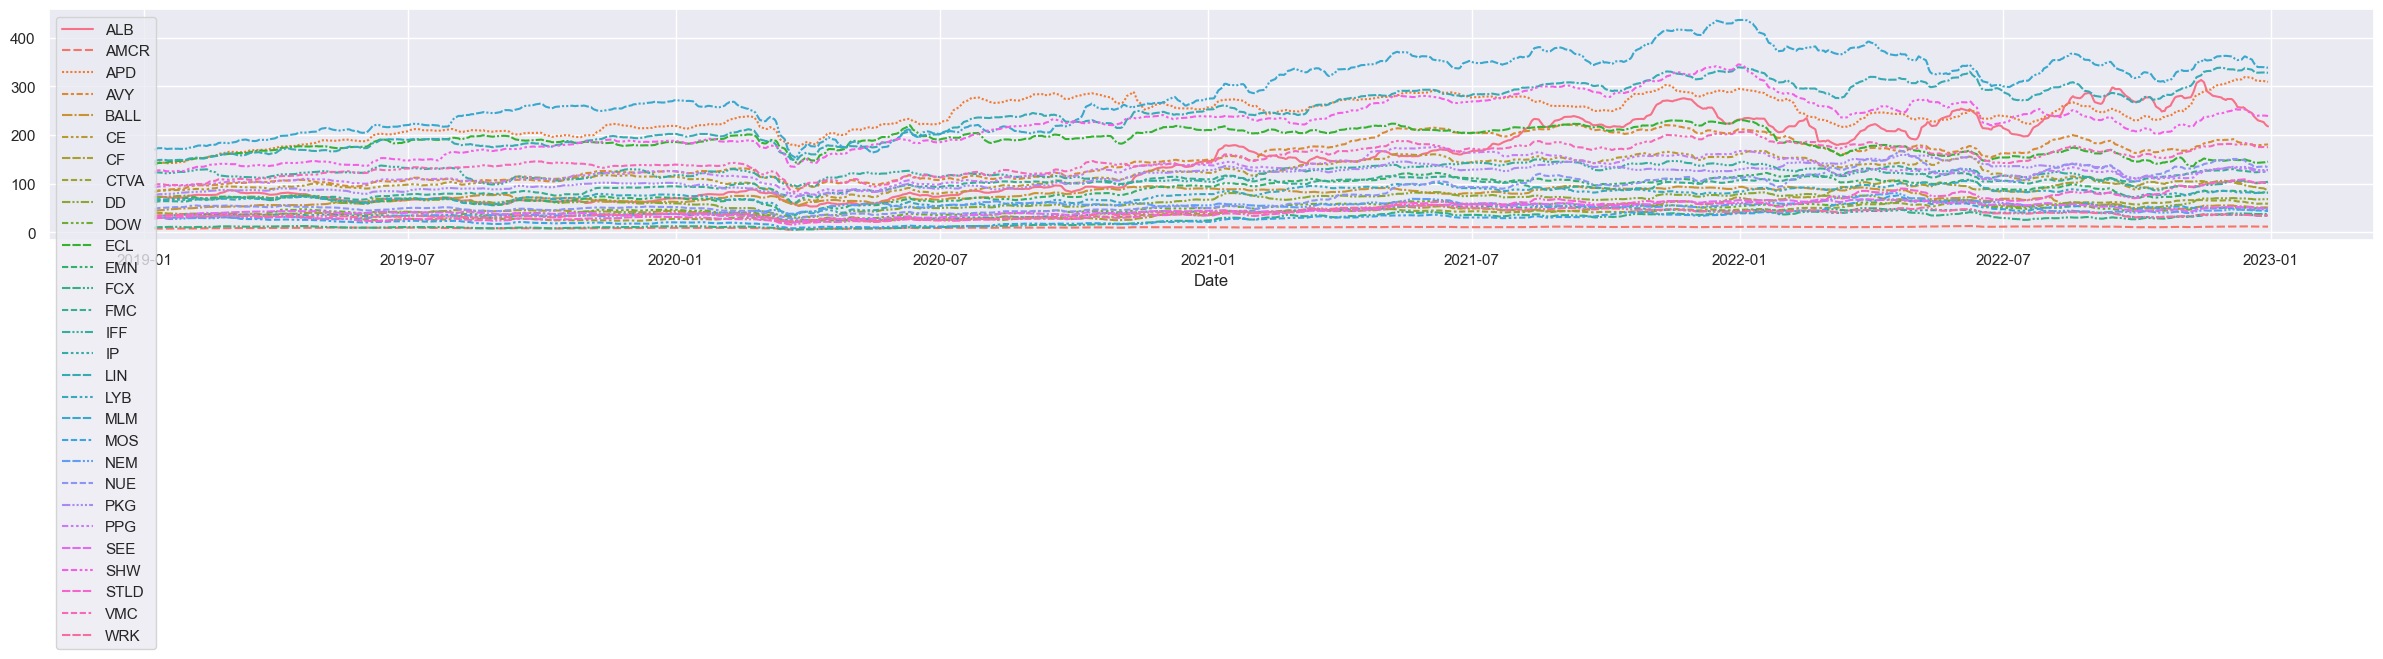

In [61]:
# Graficamos la media movil de las empresas
df_mt = df[df['GICS Sector']=='Materials']
MtSymbols = df_mt['Symbol'].to_list()
MediamovilMt =  MediaMovilAdjClose[MediaMovilAdjClose.columns.intersection(MtSymbols)]
sns.lineplot(data=MediamovilMt)

In [62]:
Mediamovil2019Mt = MediaMovil2019[MediaMovil2019.columns.intersection(MtSymbols)]
Promedio2019Mt = Mediamovil2019Mt.mean()
Mediamovil2020Mt = MediaMovil2020[MediaMovil2020.columns.intersection(MtSymbols)]
Promedio2020Mt = Mediamovil2020Mt.mean()
Mediamovil2021Mt = MediaMovil2021[MediaMovil2021.columns.intersection(MtSymbols)]
Promedio2021Mt = Mediamovil2021Mt.mean()
Mediamovil2022Mt = MediaMovil2022[MediaMovil2022.columns.intersection(MtSymbols)]
Promedio2022Mt = Mediamovil2022Mt.mean()

In [63]:
trace1 = go.Bar(
    x=Promedio2019Mt.index,
    y=Promedio2019Mt,
    name='2019',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Bar(
    x=Promedio2020Mt.index,
    y=Promedio2020Mt,
    name='2020',
    yaxis='y2'

)
trace3 = go.Bar(
    x=Promedio2021Mt.index,
    y=Promedio2021Mt,
    name='2021',
    yaxis='y3'

)
trace4 = go.Bar(
    x=Promedio2022Mt.index,
    y=Promedio2022Mt,
    name='2022',
    yaxis='y4'
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.add_trace(trace3,secondary_y=True)
fig.add_trace(trace4,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = 'AdjClose promedio-Mt',xaxis=dict(
      tickangle=-90
    ))
iplot(fig)

Analizaremos NUE,STLD,FCX,CF,ALB.

In [64]:
SelectedSymbols.append('NUE')
SelectedSymbols.append('STLD')
SelectedSymbols.append('FCX')
SelectedSymbols.append('CF')
SelectedSymbols.append('ALB')

Communication Services


<AxesSubplot: xlabel='Date'>

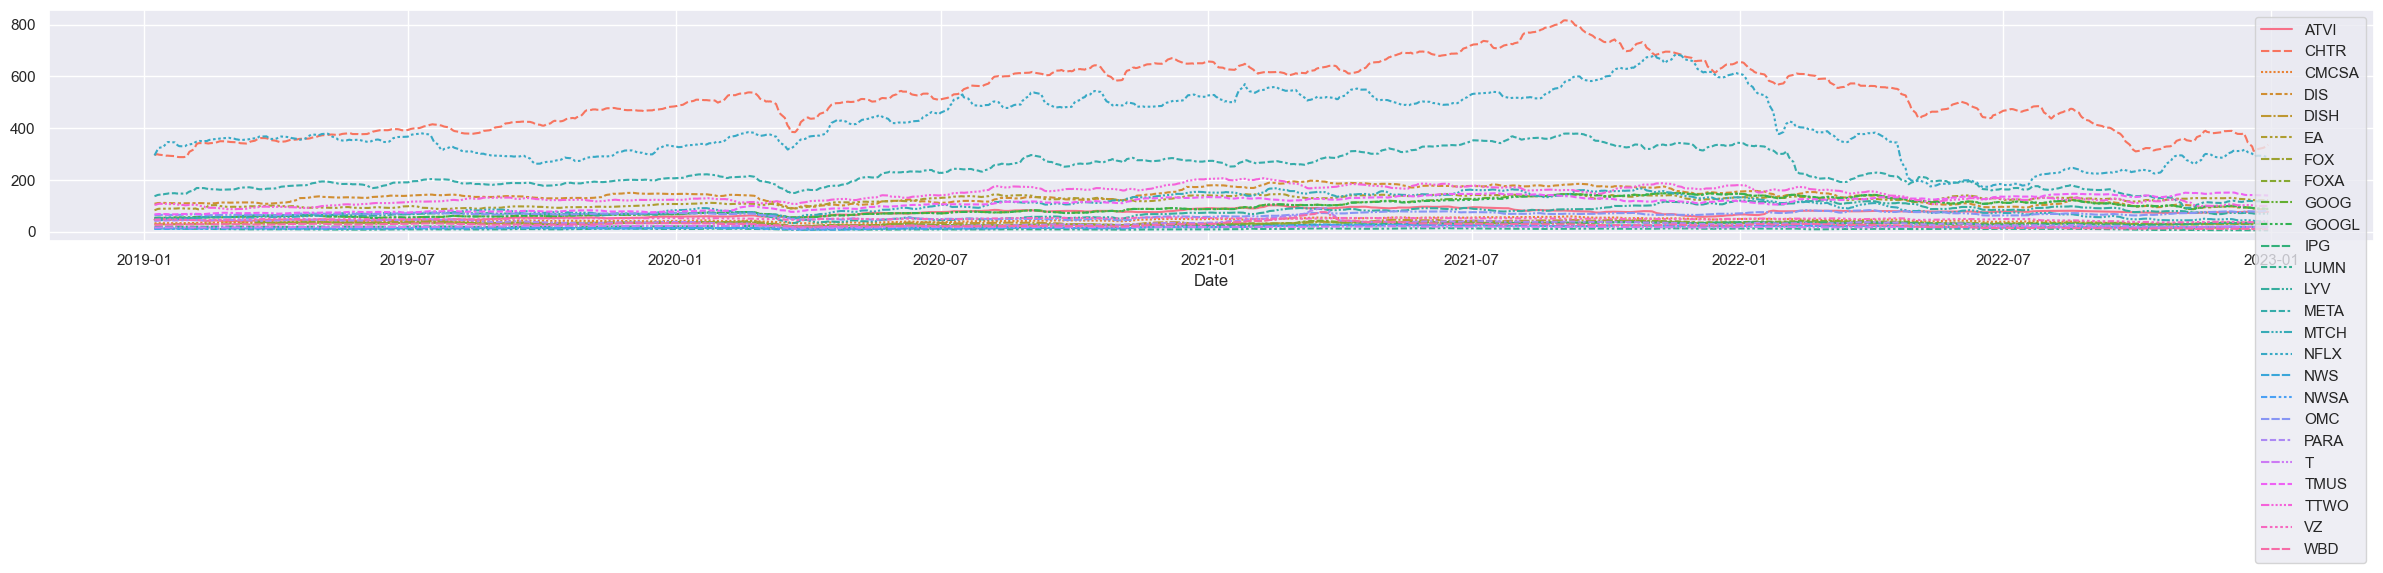

In [65]:
# Graficamos la media movil de las empresas
df_cs = df[df['GICS Sector']=='Communication Services']
CsSymbols = df_cs['Symbol'].to_list()
MediamovilCs =  MediaMovilAdjClose[MediaMovilAdjClose.columns.intersection(CsSymbols)]
sns.lineplot(data=MediamovilCs)

In [66]:
Mediamovil2019Cs = MediaMovil2019[MediaMovil2019.columns.intersection(CsSymbols)]
Promedio2019Cs = Mediamovil2019Cs.mean()
Mediamovil2020Cs = MediaMovil2020[MediaMovil2020.columns.intersection(CsSymbols)]
Promedio2020Cs = Mediamovil2020Cs.mean()
Mediamovil2021Cs = MediaMovil2021[MediaMovil2021.columns.intersection(CsSymbols)]
Promedio2021Cs = Mediamovil2021Cs.mean()
Mediamovil2022Cs = MediaMovil2022[MediaMovil2022.columns.intersection(CsSymbols)]
Promedio2022Cs = Mediamovil2022Cs.mean()

In [67]:
trace1 = go.Bar(
    x=Promedio2019Cs.index,
    y=Promedio2019Cs,
    name='2019',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Bar(
    x=Promedio2020Cs.index,
    y=Promedio2020Cs,
    name='2020',
    yaxis='y2'

)
trace3 = go.Bar(
    x=Promedio2021Cs.index,
    y=Promedio2021Cs,
    name='2021',
    yaxis='y3'

)
trace4 = go.Bar(
    x=Promedio2022Cs.index,
    y=Promedio2022Cs,
    name='2022',
    yaxis='y4'
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.add_trace(trace3,secondary_y=True)
fig.add_trace(trace4,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = 'AdjClose promedio-Cs',xaxis=dict(
      tickangle=-90
    ))
iplot(fig)

Analizaremos Goog, googl.

In [68]:
SelectedSymbols.append('GOOG')
SelectedSymbols.append('GOOGL')

Energy

<AxesSubplot: xlabel='Date'>

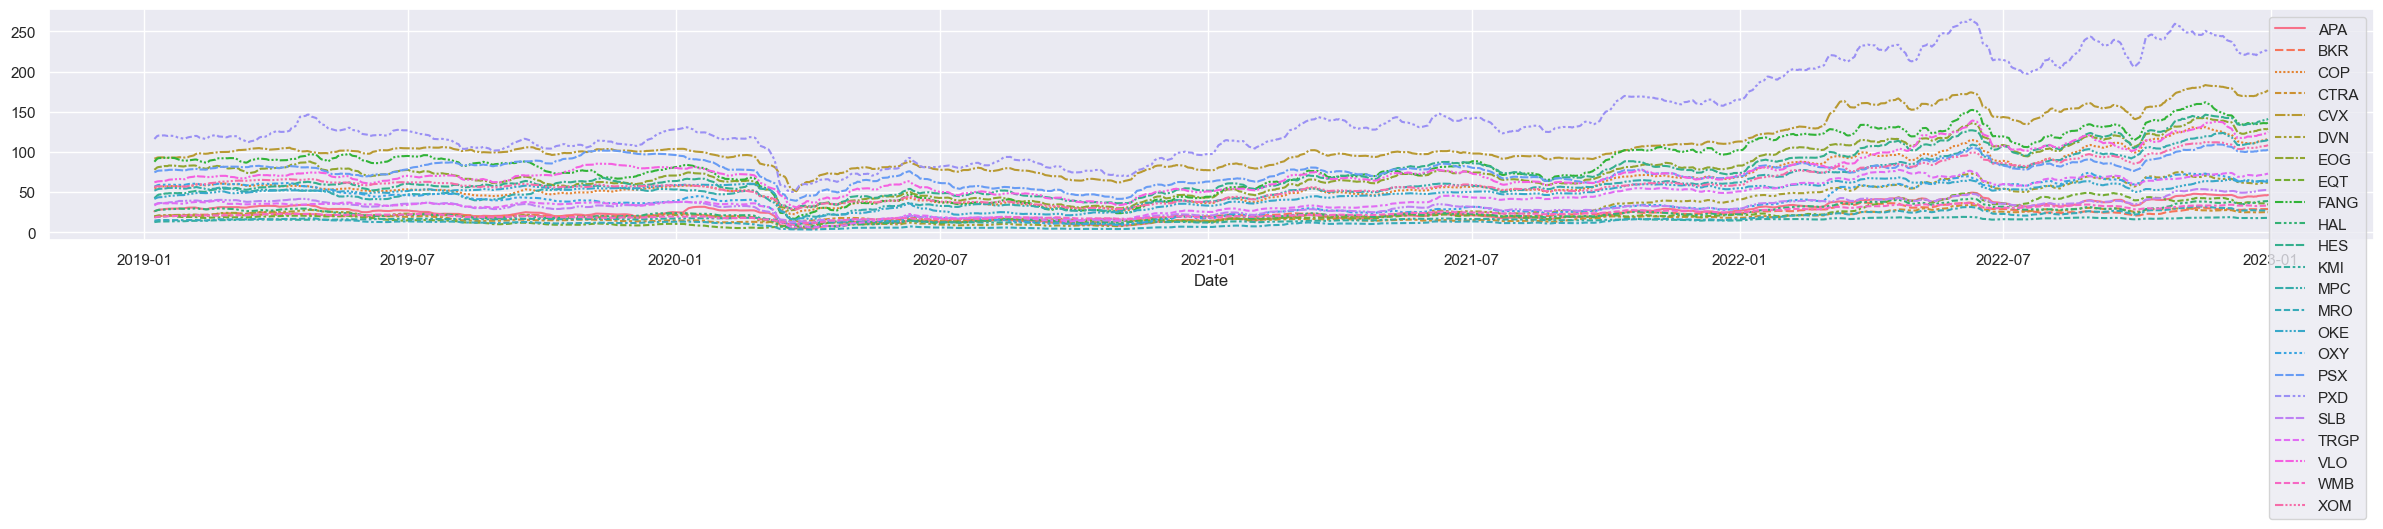

In [69]:
# Graficamos la media movil de las empresas
df_en = df[df['GICS Sector']=='Energy']
EnSymbols = df_en['Symbol'].to_list()
MediamovilEn =  MediaMovilAdjClose[MediaMovilAdjClose.columns.intersection(EnSymbols)]
sns.lineplot(data=MediamovilEn)

In [70]:
Mediamovil2019En = MediaMovil2019[MediaMovil2019.columns.intersection(EnSymbols)]
Promedio2019En = Mediamovil2019En.mean()
Mediamovil2020En = MediaMovil2020[MediaMovil2020.columns.intersection(EnSymbols)]
Promedio2020En = Mediamovil2020En.mean()
Mediamovil2021En = MediaMovil2021[MediaMovil2021.columns.intersection(EnSymbols)]
Promedio2021En = Mediamovil2021En.mean()
Mediamovil2022En = MediaMovil2022[MediaMovil2022.columns.intersection(EnSymbols)]
Promedio2022En = Mediamovil2022En.mean()

In [71]:
trace1 = go.Bar(
    x=Promedio2019En.index,
    y=Promedio2019En,
    name='2019',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Bar(
    x=Promedio2020En.index,
    y=Promedio2020En,
    name='2020',
    yaxis='y2'

)
trace3 = go.Bar(
    x=Promedio2021En.index,
    y=Promedio2021En,
    name='2021',
    yaxis='y3'

)
trace4 = go.Bar(
    x=Promedio2022En.index,
    y=Promedio2022En,
    name='2022',
    yaxis='y4'
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig.add_trace(trace3,secondary_y=True)
fig.add_trace(trace4,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = 'AdjClose promedio-En',xaxis=dict(
      tickangle=-90
    ))
iplot(fig)

Analizaremos DVN y EQT.

In [72]:
SelectedSymbols.append('DVN')
SelectedSymbols.append('EQT')


In [73]:
#Vemos la cantidad de empresas seleccionadas.
len(SelectedSymbols)

35

Todavía es un número bastante grande, por lo que elegiremos las empresas con mayores tendencias alcistas. 

In [74]:
#Lo divido en 3 partes para visualizar mejor los gráficos. 
SelectedSymbolsI = SelectedSymbols[0:12]
SelectedSymbolsII = SelectedSymbols[13:26]
SelectedSymbolsIII = SelectedSymbols[26:35]

<AxesSubplot: xlabel='Date'>

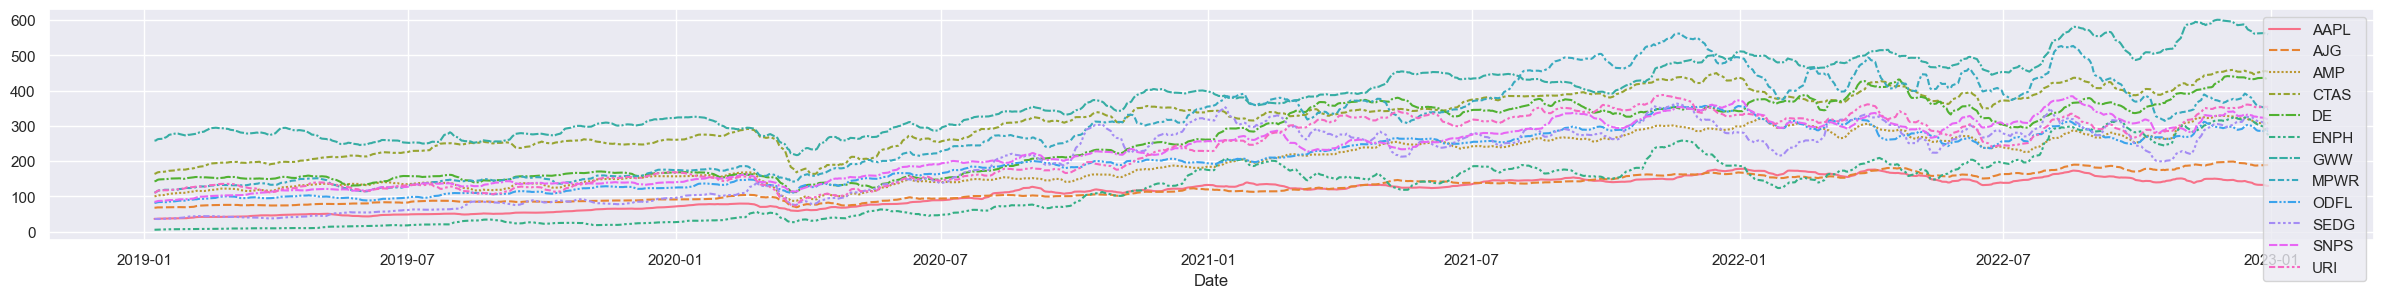

In [75]:
#Vemos la media movil de las empresas filtradas, desde el 2019 al 2021.
MediaMovilSelected = MediaMovilAdjClose[MediaMovilAdjClose.columns.intersection(SelectedSymbolsI)]
sns.lineplot(data=MediaMovilSelected)

<AxesSubplot: xlabel='Date'>

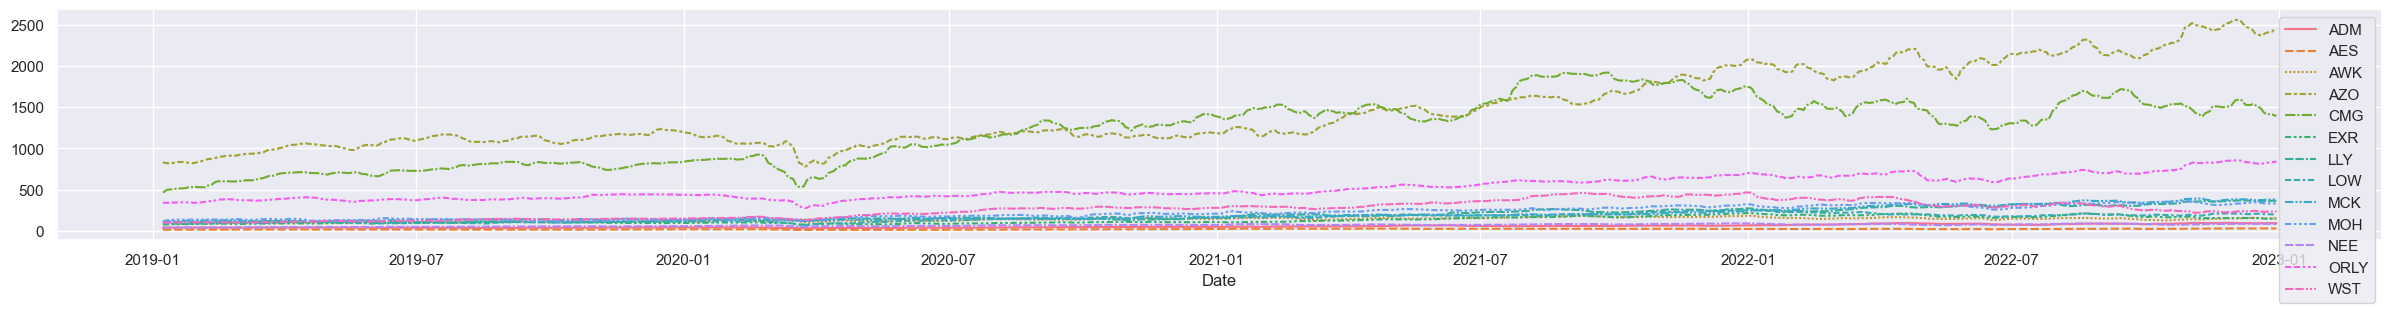

In [76]:
MediaMovilSelected = MediaMovilAdjClose[MediaMovilAdjClose.columns.intersection(SelectedSymbolsII)]
sns.lineplot(data=MediaMovilSelected)

<AxesSubplot: xlabel='Date'>

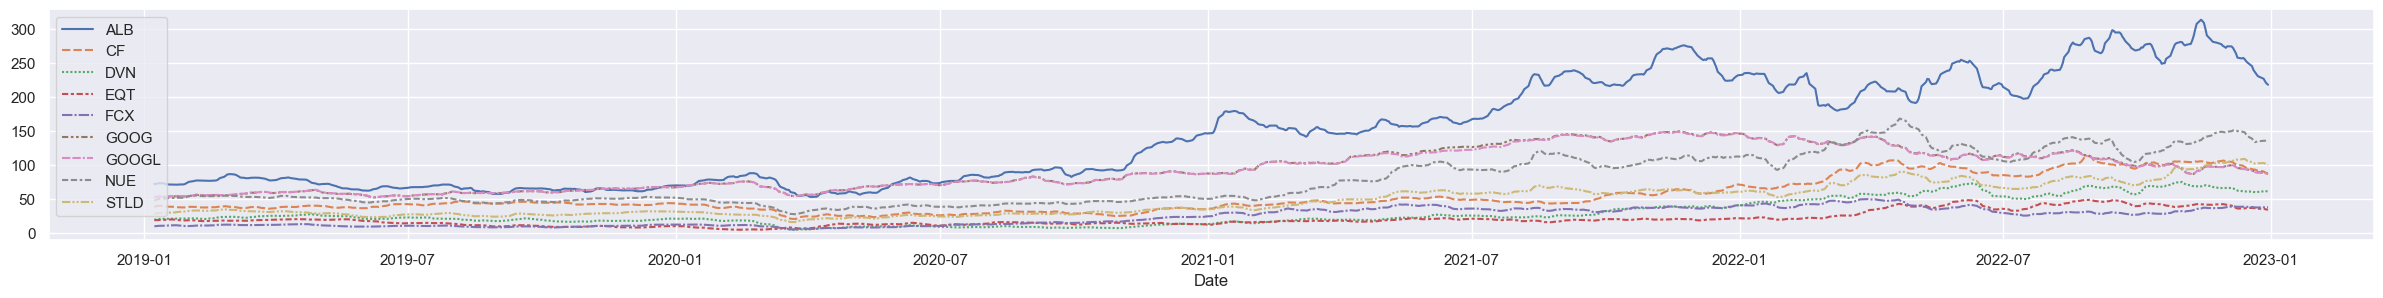

In [77]:
MediaMovilSelected = MediaMovilAdjClose[MediaMovilAdjClose.columns.intersection(SelectedSymbolsIII)]
sns.lineplot(data=MediaMovilSelected)

In [78]:
MediaMovilAdjCloseAll = dataframe['Adj Close'].rolling(5).mean()

<AxesSubplot: xlabel='Date'>

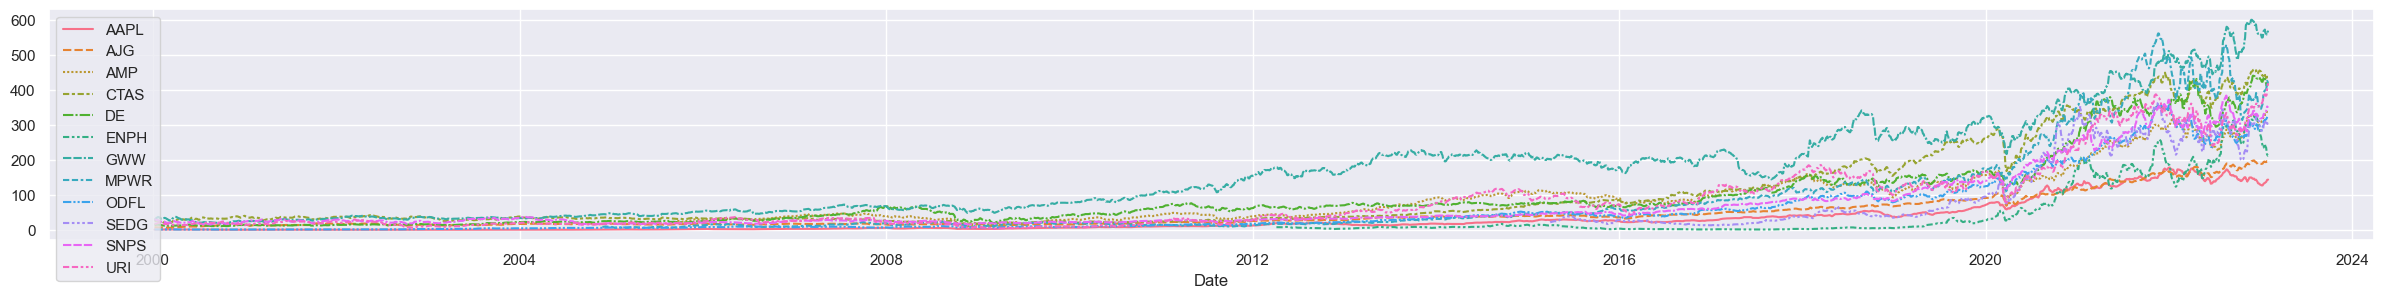

In [79]:
MediaMovilSelectedAllYears = MediaMovilAdjCloseAll[MediaMovilAdjCloseAll.columns.intersection(SelectedSymbolsI)]
sns.lineplot(data=MediaMovilSelectedAllYears)

In [80]:
SelectedSymbolsaux = ['EXR']

<AxesSubplot: xlabel='Date'>

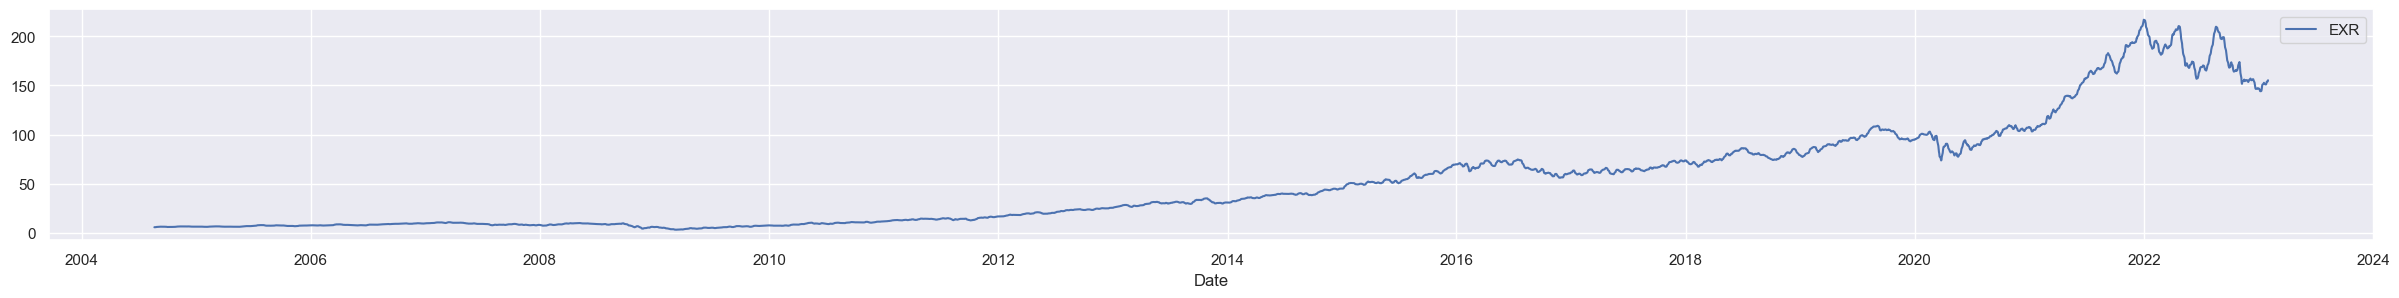

In [81]:
MediaMovilSelectedAllYears = MediaMovilAdjCloseAll[MediaMovilAdjCloseAll.columns.intersection(SelectedSymbolsaux)]
sns.lineplot(data=MediaMovilSelectedAllYears)

Las empresas con mayor tendencia alcista en este grupo son ALB, AWK, EXR y NUE.

<AxesSubplot: xlabel='Date'>

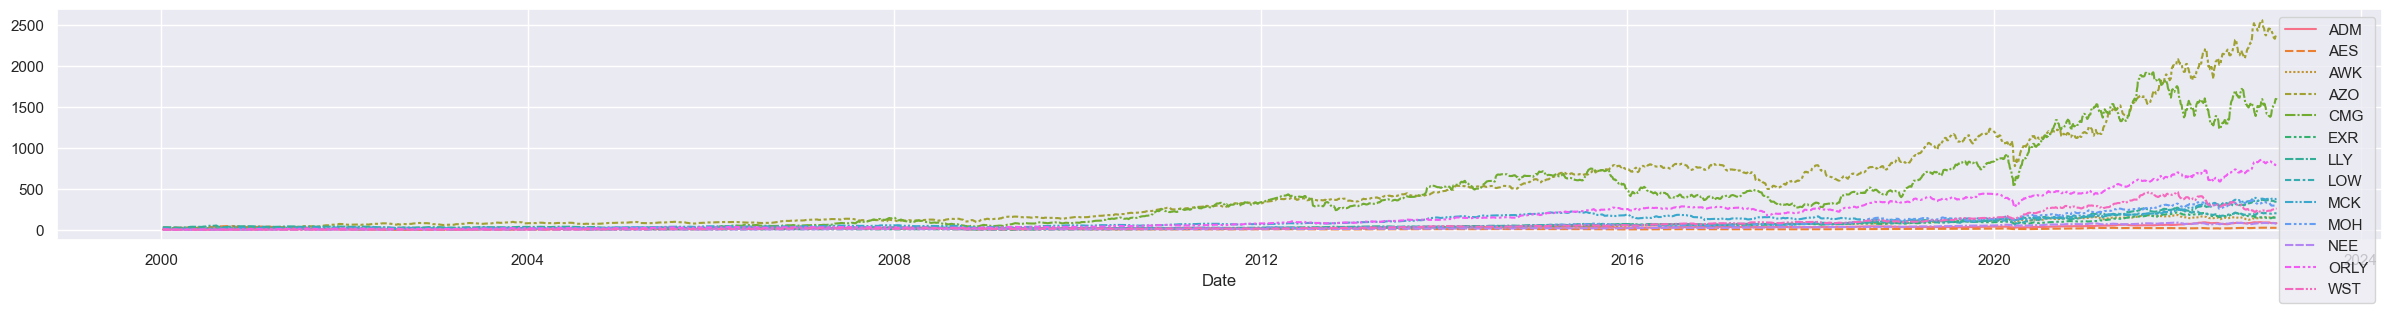

In [82]:
MediaMovilSelectedAllYears = MediaMovilAdjCloseAll[MediaMovilAdjCloseAll.columns.intersection(SelectedSymbolsII)]
sns.lineplot(data=MediaMovilSelectedAllYears)

In [83]:
SelectedSymbolsII.remove('AZO')
SelectedSymbolsII.remove('CMG')

<AxesSubplot: xlabel='Date'>

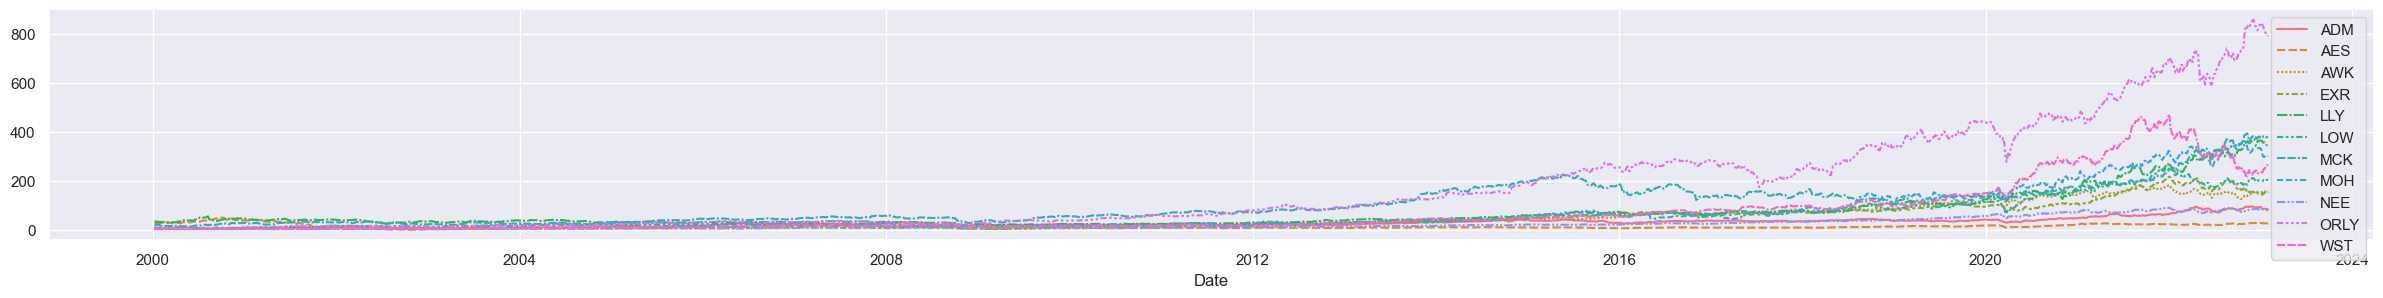

In [84]:
MediaMovilSelectedAllYears = MediaMovilAdjCloseAll[MediaMovilAdjCloseAll.columns.intersection(SelectedSymbolsII)]
sns.lineplot(data=MediaMovilSelectedAllYears)

<AxesSubplot: xlabel='Date'>

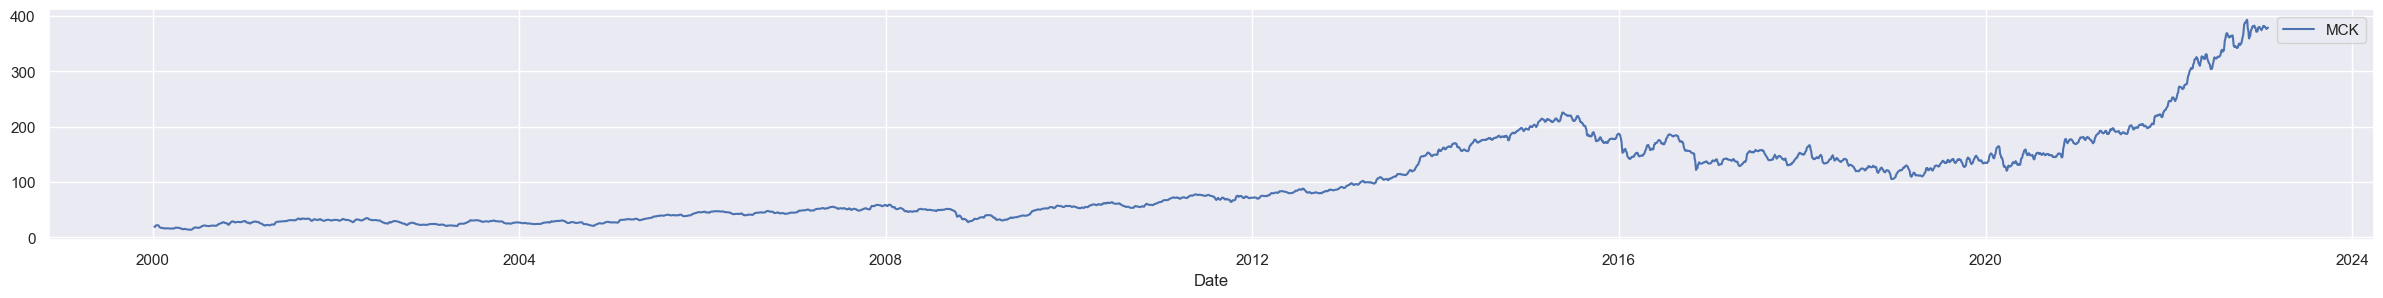

In [85]:
SelectedSymbolsaux = ['MCK']
MediaMovilSelectedAllYears = MediaMovilAdjCloseAll[MediaMovilAdjCloseAll.columns.intersection(SelectedSymbolsaux)]
sns.lineplot(data=MediaMovilSelectedAllYears)

Vemos que las empresas con mayor tendencia alcista han sido AZO, CMG , ORLY y MCK. 

<AxesSubplot: xlabel='Date'>

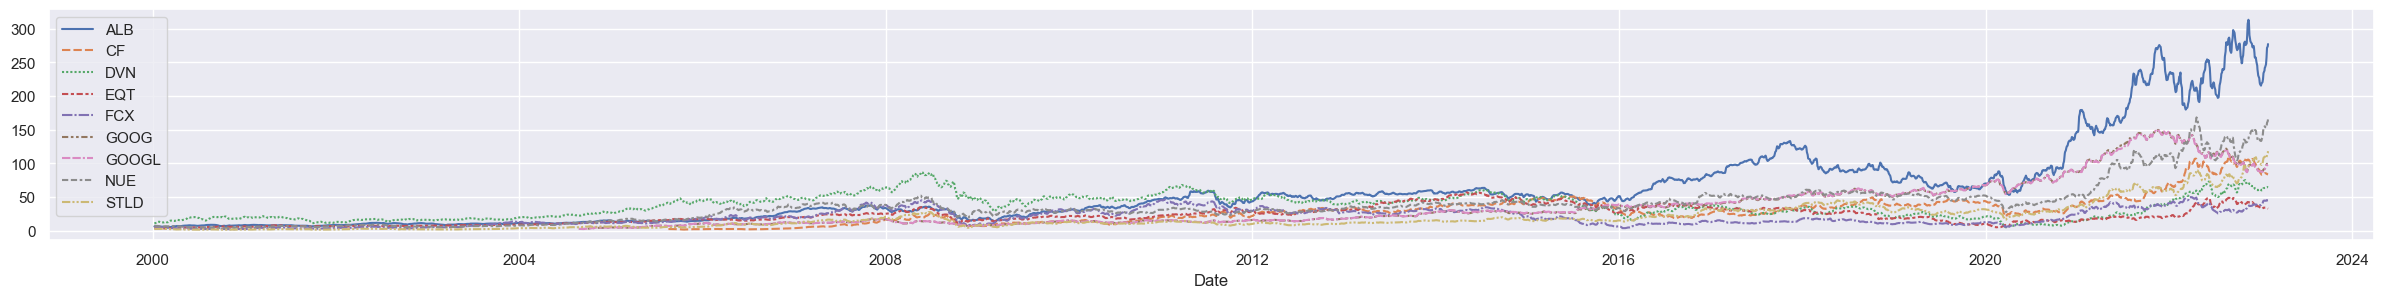

In [86]:
MediaMovilSelectedAllYears = MediaMovilAdjCloseAll[MediaMovilAdjCloseAll.columns.intersection(SelectedSymbolsIII)]
sns.lineplot(data=MediaMovilSelectedAllYears)

Vemos las empresas que han tenido mayor crecimiento del valor a traves del tiempo son GWW, CTAS, DE, MPWR, ODFL, SNPS.

 Finalmente las empresas a analizar son ALB, AWK, EXR , NUE, AZO, CMG , ORLY, MCK, GWW, CTAS, DE, MPWR, ODFL, SNPS

In [87]:
SelectedSymbolsFinal = ['ALB','AWK','EXR','NUE','AZO','CMG','ORLY','MCK','GWW','CTAS','DE','MPWR','ODFL','SNPS']

<AxesSubplot: xlabel='Date'>

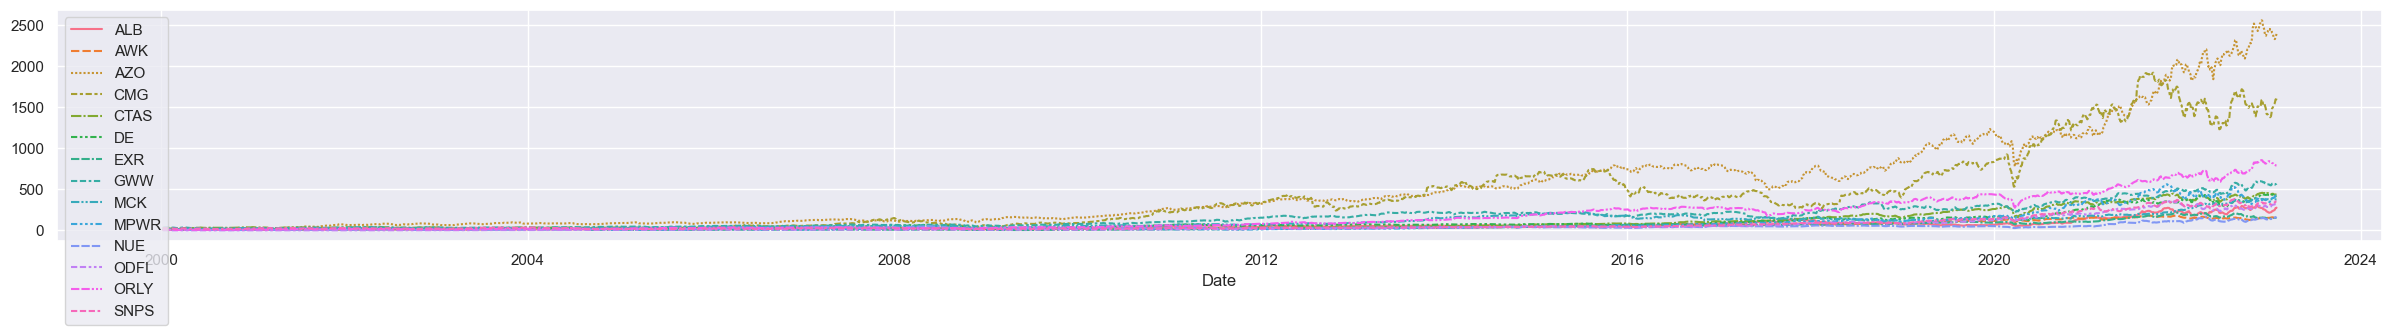

In [88]:
#Elegimos 5
MediaMovilSelectedAllYears = MediaMovilAdjCloseAll[MediaMovilAdjCloseAll.columns.intersection(SelectedSymbolsFinal)]
sns.lineplot(data=MediaMovilSelectedAllYears)

In [89]:
#Removemos AZO y CMG para visualizar mejor las demás. Tenemos en cuenta que estas empresas son las más caras. 
SelectedSymbolsFinal.remove('AZO')
SelectedSymbolsFinal.remove('CMG')

<AxesSubplot: xlabel='Date'>

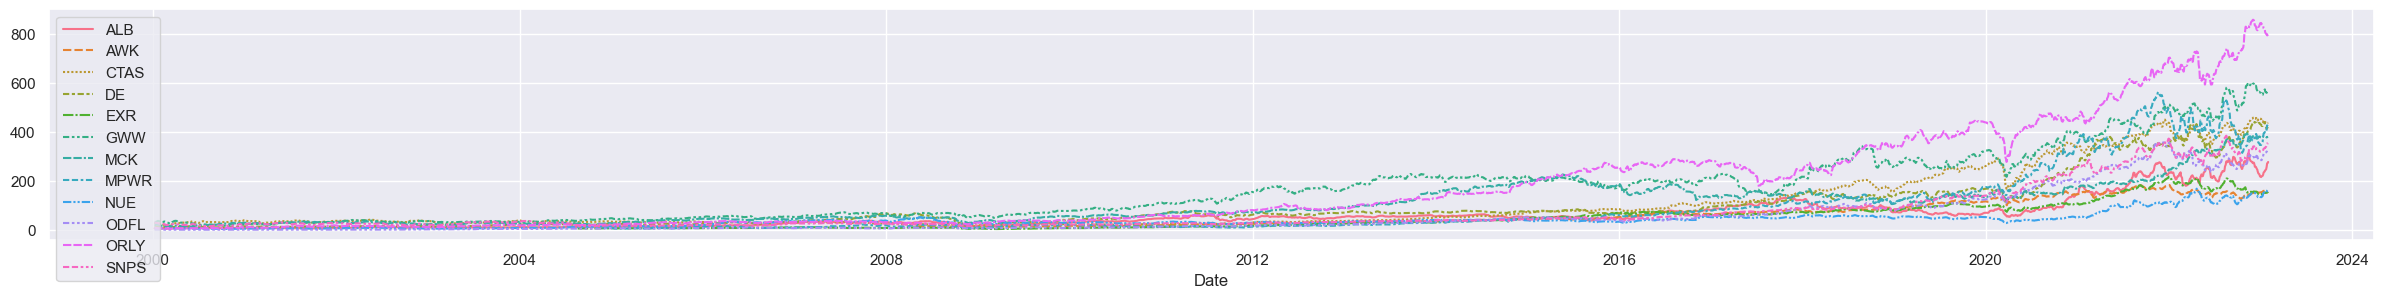

In [90]:
#Elegimos 5
MediaMovilSelectedAllYears = MediaMovilAdjCloseAll[MediaMovilAdjCloseAll.columns.intersection(SelectedSymbolsFinal)]
sns.lineplot(data=MediaMovilSelectedAllYears)

In [92]:
SelectedSymbolsFinalII = ['AZO','CMG', 'ORLY','GWW' ,'CTAS']


A tener en cuenta : AZO Y CMG, son las empresas más caras. ORLY Y GWW son intermedias y CTAS la más económica. 

In [93]:
#Guardamos los datos de esas cinco empresas elegidas. 
SelectedCompaniesDataframe = df[df['Symbol'].isin(SelectedSymbolsFinalII)]
SelectedCompaniesDataframe.to_csv('SelectedCompanies.csv')